In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import parallel_coordinates
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS

In [2]:
# Read the results file into a pandas DataFrame
file_path = 'results/complexity_measures_syn.csv'
df = pd.read_csv(file_path)
df

,F1v,N1,N2,N3,N4,LSC,T1,T2,T3,T4,...,C2,L1,L2,L3,density,cls_coef,hubs,att_value,att,dataset
0,0.059053,0.304664,0.019545,0.199677,0.829800,0.987399,0.270947,0.000404,0.000404,1.0,...,0.001441,0.840397,0.146376,0.901878,0.839679,0.023555,0.999798,0.0,A,S1E3
1,0.054411,0.267684,0.023784,0.176144,0.834159,0.983837,0.236180,0.000396,0.000396,1.0,...,0.109900,0.845409,0.131167,0.899148,0.828851,0.008485,0.999802,1.0,A,S1E3
2,0.062982,0.407026,0.037749,0.267313,0.752473,0.995167,0.361599,0.000404,0.000404,1.0,...,0.013810,0.780249,0.200283,0.852009,0.836404,0.020674,0.999798,0.0,A,S4B0_4
3,0.055684,0.376858,0.055022,0.246087,0.773925,0.996012,0.331880,0.000396,0.000396,1.0,...,0.038065,0.800021,0.178522,0.865861,0.832891,0.009904,0.999802,1.0,A,S4B0_4
4,0.061087,0.302443,0.015817,0.195841,0.819503,0.984022,0.268928,0.000404,0.000404,1.0,...,0.135078,0.845232,0.145568,0.896426,0.831771,0.029264,0.999798,0.0,A,S4F3_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,0.038126,0.174559,0.017629,0.115118,0.849019,0.912750,0.158114,0.000396,0.000396,1.0,...,0.465301,0.890340,0.084010,0.885278,0.485205,0.005024,0.999802,1.0,A,S4E2_2
654,0.058197,0.302847,0.016584,0.200888,0.834040,0.985637,0.271351,0.000404,0.000404,1.0,...,0.006236,0.838509,0.147587,0.909752,0.839411,0.024019,0.999798,0.0,A,S1F1
655,0.188673,0.400057,0.034480,0.263307,0.709230,0.991600,0.350793,0.000566,0.000566,1.0,...,0.168121,0.779792,0.202718,0.780011,0.878880,0.140384,0.999717,1.0,A,S1F1
656,0.058851,0.314759,0.016261,0.205128,0.818090,0.984950,0.278215,0.000404,0.000404,1.0,...,0.056825,0.842863,0.149203,0.899051,0.836757,0.026979,0.999798,0.0,A,S4A11


In [3]:
# Select pure bias:
select_experiments = ['S1A', 'S1B', 'S1C', 'S1D', 'S1E', 'S1F', 'S2A', 'S3A', 'S4A']
df_selected = df[df.dataset.str.contains('|'.join(select_experiments))]
df_selected

,F1v,N1,N2,N3,N4,LSC,T1,T2,T3,T4,...,C2,L1,L2,L3,density,cls_coef,hubs,att_value,att,dataset
0,0.059053,0.304664,0.019545,0.199677,0.829800,0.987399,0.270947,0.000404,0.000404,1.0,...,0.001441,0.840397,0.146376,0.901878,0.839679,0.023555,0.999798,0.0,A,S1E3
1,0.054411,0.267684,0.023784,0.176144,0.834159,0.983837,0.236180,0.000396,0.000396,1.0,...,0.109900,0.845409,0.131167,0.899148,0.828851,0.008485,0.999802,1.0,A,S1E3
6,0.060831,0.275389,0.014426,0.188371,0.779326,0.980451,0.246921,0.000404,0.000404,1.0,...,0.411520,0.866537,0.134262,0.833838,0.806281,0.035471,0.999798,0.0,A,S2A9
7,0.049302,0.161680,0.010710,0.110164,0.866059,0.933145,0.144046,0.000396,0.000396,1.0,...,0.509037,0.901433,0.074698,0.891817,0.785635,0.004870,0.999802,1.0,A,S2A9
26,0.061614,0.287301,0.014796,0.193014,0.793862,0.981710,0.254391,0.000404,0.000404,1.0,...,0.321825,0.861052,0.137694,0.866142,0.815216,0.033730,0.999798,0.0,A,S2A8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,0.049569,0.277987,0.023414,0.182683,0.844264,0.974375,0.242124,0.000396,0.000396,1.0,...,0.107183,0.845804,0.129582,0.905885,0.795904,0.008330,0.999802,1.0,A,S4A2
654,0.058197,0.302847,0.016584,0.200888,0.834040,0.985637,0.271351,0.000404,0.000404,1.0,...,0.006236,0.838509,0.147587,0.909752,0.839411,0.024019,0.999798,0.0,A,S1F1
655,0.188673,0.400057,0.034480,0.263307,0.709230,0.991600,0.350793,0.000566,0.000566,1.0,...,0.168121,0.779792,0.202718,0.780011,0.878880,0.140384,0.999717,1.0,A,S1F1
656,0.058851,0.314759,0.016261,0.205128,0.818090,0.984950,0.278215,0.000404,0.000404,1.0,...,0.056825,0.842863,0.149203,0.899051,0.836757,0.026979,0.999798,0.0,A,S4A11


In [4]:
measures_columns= ['F1v', 'N1', 'N2', 'N3', 'N4', 'LSC', 'T1', 'T2', 'T3', 'T4', 'C1',
       'C2', 'L1', 'L2', 'L3', 'density', 'cls_coef', 'hubs']

In [5]:
dataset_sensitive_dict = {}
for dataset in df_selected['dataset'].unique():
    sensitive_values = df_selected[df_selected['dataset'] == dataset]['att'].unique()
    dataset_sensitive_dict[dataset] = list(sensitive_values)

# Initialize an empty dictionary to store the calculations for each dataset and sensitive_attribute
calculation_dict_corrected = {}

# Loop through each unique dataset and sensitive_attribute to perform the corrected calculation
for dataset, sensitive_attributes in dataset_sensitive_dict.items():
    calculation_dict_corrected[dataset] = {}
    for sensitive_attribute in sensitive_attributes:
        # Filter the DataFrame for rows matching the current dataset and sensitive_attribute
        filtered_df = df_selected[(df_selected['dataset'] == dataset) & (df_selected['att'] == sensitive_attribute)]

        # Extract the rows where sensitive_value is 0 and 1
        row_0 = filtered_df[filtered_df['att_value'] == 0].select_dtypes(include=['number'])
        row_1 = filtered_df[filtered_df['att_value'] == 1].select_dtypes(include=['number'])

        calculation = {}
        # If both rows exist, perform the corrected calculation, row_1 will always contain the privileged group
        if not row_0.empty and not row_1.empty:
            for e in measures_columns:
                if e != 'att_value':
                    calculation[e] = abs(row_0[e].values[0] - row_1[e].values[0])
                    print(f"{dataset} - {sensitive_attribute} - {e}: {calculation[e]}")
            calculation_dict_corrected[dataset][sensitive_attribute] = calculation


S1E3 - A - F1v: 0.004641401077096395
S1E3 - A - N1: 0.03698006755876948
S1E3 - A - N2: 0.004238767638105101
S1E3 - A - N3: 0.02353271935108181
S1E3 - A - N4: 0.004358785142255184
S1E3 - A - LSC: 0.003561732276927798
S1E3 - A - T1: 0.0347669920114142
S1E3 - A - T2: 7.520664525899974e-06
S1E3 - A - T3: 7.520664525899974e-06
S1E3 - A - T4: 0.0
S1E3 - A - C1: 0.0418389931513553
S1E3 - A - C2: 0.1084593263599036
S1E3 - A - L1: 0.00501156052180296
S1E3 - A - L2: 0.015208903858744877
S1E3 - A - L3: 0.002729641191095644
S1E3 - A - density: 0.010827600912453605
S1E3 - A - cls_coef: 0.015069990198261001
S1E3 - A - hubs: 3.72106601098654e-06
S2A9 - A - F1v: 0.011528199401579002
S2A9 - A - N1: 0.11370844727840157
S2A9 - A - N2: 0.0037164391858243006
S2A9 - A - N3: 0.07820623030250949
S2A9 - A - N4: 0.08673338376178918
S2A9 - A - LSC: 0.047306223913475054
S2A9 - A - T1: 0.1028750900429562
S2A9 - A - T2: 7.520664525899974e-06
S2A9 - A - T3: 7.520664525899974e-06
S2A9 - A - T4: 0.0
S2A9 - A - C1: 0.0

In [6]:
# Convert the calculation results to a DataFrame
result_list_corrected = []
for dataset, sensitive_dict in calculation_dict_corrected.items():
    for sensitive_attr, values in sensitive_dict.items():
        row = {'dataset': dataset, 'sensitive_attribute': sensitive_attr}
        row.update(values)
        print(row)
        result_list_corrected.append(row)

result_df = pd.DataFrame(result_list_corrected)
result_df

{'dataset': 'S1E3', 'sensitive_attribute': 'A', 'F1v': np.float64(0.004641401077096395), 'N1': np.float64(0.03698006755876948), 'N2': np.float64(0.004238767638105101), 'N3': np.float64(0.02353271935108181), 'N4': np.float64(0.004358785142255184), 'LSC': np.float64(0.003561732276927798), 'T1': np.float64(0.0347669920114142), 'T2': np.float64(7.520664525899974e-06), 'T3': np.float64(7.520664525899974e-06), 'T4': np.float64(0.0), 'C1': np.float64(0.0418389931513553), 'C2': np.float64(0.1084593263599036), 'L1': np.float64(0.00501156052180296), 'L2': np.float64(0.015208903858744877), 'L3': np.float64(0.002729641191095644), 'density': np.float64(0.010827600912453605), 'cls_coef': np.float64(0.015069990198261001), 'hubs': np.float64(3.72106601098654e-06)}
{'dataset': 'S2A9', 'sensitive_attribute': 'A', 'F1v': np.float64(0.011528199401579002), 'N1': np.float64(0.11370844727840157), 'N2': np.float64(0.0037164391858243006), 'N3': np.float64(0.07820623030250949), 'N4': np.float64(0.08673338376178

,dataset,sensitive_attribute,F1v,N1,N2,N3,N4,LSC,T1,T2,T3,T4,C1,C2,L1,L2,L3,density,cls_coef,hubs
0,S1E3,A,0.004641,0.036980,0.004239,0.023533,0.004359,0.003562,0.034767,0.000008,0.000008,0.0,0.041839,0.108459,0.005012,0.015209,0.002730,0.010828,0.015070,0.000004
1,S2A9,A,0.011528,0.113708,0.003716,0.078206,0.086733,0.047306,0.102875,0.000008,0.000008,0.0,0.066734,0.097518,0.034896,0.059564,0.057979,0.020645,0.030602,0.000004
2,S2A8,A,0.012959,0.112543,0.003028,0.074330,0.062488,0.039978,0.097268,0.000008,0.000008,0.0,0.073645,0.121919,0.029724,0.053090,0.021712,0.021332,0.028407,0.000004
3,S1E2,A,0.003263,0.021167,0.007750,0.018038,0.005257,0.001158,0.022363,0.000008,0.000008,0.0,0.029406,0.077774,0.003345,0.003477,0.016167,0.007574,0.013861,0.000004
4,S1D0,A,0.002338,0.003414,0.023239,0.001365,0.016684,0.002499,0.003184,0.000389,0.000389,0.0,0.000281,0.000758,0.007381,0.010071,0.004024,0.000131,0.011066,0.000195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,S2A5,A,0.005688,0.082975,0.003505,0.052806,0.027259,0.010036,0.071188,0.000008,0.000008,0.0,0.072643,0.169443,0.020410,0.039648,0.001567,0.018262,0.019723,0.000004
69,S2A4,A,0.004530,0.052704,0.006743,0.034468,0.006946,0.005772,0.047493,0.000008,0.000008,0.0,0.055040,0.138403,0.012649,0.027348,0.013725,0.013932,0.016654,0.000004
70,S4A2,A,0.010071,0.027485,0.003836,0.017196,0.022136,0.013033,0.029227,0.000008,0.000008,0.0,0.040892,0.106215,0.004634,0.015785,0.006088,0.043910,0.015104,0.000004
71,S1F1,A,0.130477,0.097210,0.017896,0.062419,0.124810,0.005963,0.079442,0.000162,0.000162,0.0,0.064996,0.161885,0.058716,0.055131,0.129740,0.039469,0.116365,0.000081


In [7]:
#result_df = df_selected.copy()
result_df['complete_name'] = result_df.reset_index().apply(lambda row: f"{row['dataset']}", axis=1).values
# Set 'complete_name' as the index of the DataFrame
result_df.set_index('complete_name', inplace=True)
result_df.drop(['sensitive_attribute', 'dataset'], axis=1, inplace=True)
result_df.sort_index(inplace=True)
result_df.shape

(73, 18)

In [8]:
result_df.describe()

,F1v,N1,N2,N3,N4,LSC,T1,T2,T3,T4,C1,C2,L1,L2,L3,density,cls_coef,hubs
count,73.000000,73.000000,72.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,72.000000
mean,0.017836,0.053124,0.021012,0.033625,0.040192,0.021306,0.058140,0.004044,0.004051,0.047945,0.050033,0.103797,0.021263,0.030249,0.046048,0.054071,0.034880,0.002544
std,0.040728,0.039728,0.056075,0.025189,0.043410,0.047562,0.080729,0.018600,0.018598,0.148239,0.061220,0.113347,0.029355,0.027887,0.080723,0.112519,0.054181,0.012852
min,0.000000,0.003270,0.000032,0.001365,0.001462,0.000000,0.000015,0.000004,0.000004,0.000000,0.000281,0.000758,0.001063,0.000904,0.000461,0.000131,0.000000,0.000004
25%,0.004148,0.009379,0.003806,0.014337,0.011111,0.001173,0.014393,0.000008,0.000008,0.000000,0.005173,0.013199,0.006431,0.010003,0.005717,0.003643,0.011996,0.000004
50%,0.006764,0.052704,0.007134,0.031115,0.022136,0.007859,0.048297,0.000008,0.000008,0.000000,0.041839,0.077774,0.013145,0.027348,0.013789,0.013932,0.019200,0.000004
75%,0.012011,0.086881,0.007891,0.052972,0.065296,0.028027,0.077658,0.000008,0.000008,0.000000,0.073645,0.161885,0.027525,0.047198,0.038109,0.023486,0.028407,0.000004
max,0.261035,0.135736,0.280130,0.078206,0.174178,0.381770,0.664809,0.132930,0.132930,0.500000,0.399731,0.663196,0.217090,0.191803,0.413198,0.407967,0.279549,0.099798


In [9]:
result_df.isna().any()

F1v         False
N1          False
N2           True
N3          False
N4          False
LSC         False
T1          False
T2          False
T3          False
T4          False
C1          False
C2          False
L1          False
L2          False
L3          False
density     False
cls_coef    False
hubs         True
dtype: bool

In [10]:
result_df[result_df['N2'].isna()]

,F1v,N1,N2,N3,N4,LSC,T1,T2,T3,T4,C1,C2,L1,L2,L3,density,cls_coef,hubs
complete_name,,,,,,,,,,,,,,,,,,
S1C,0.0,0.008324,NaN,0.015192,0.065296,0.0,0.000015,0.000004,0.000004,0.0,0.002438,0.006577,0.010599,0.01299,0.026517,0.003026,0.0,NaN


In [11]:
result_df[result_df['hubs'].isna()]

,F1v,N1,N2,N3,N4,LSC,T1,T2,T3,T4,C1,C2,L1,L2,L3,density,cls_coef,hubs
complete_name,,,,,,,,,,,,,,,,,,
S1C,0.0,0.008324,NaN,0.015192,0.065296,0.0,0.000015,0.000004,0.000004,0.0,0.002438,0.006577,0.010599,0.01299,0.026517,0.003026,0.0,NaN


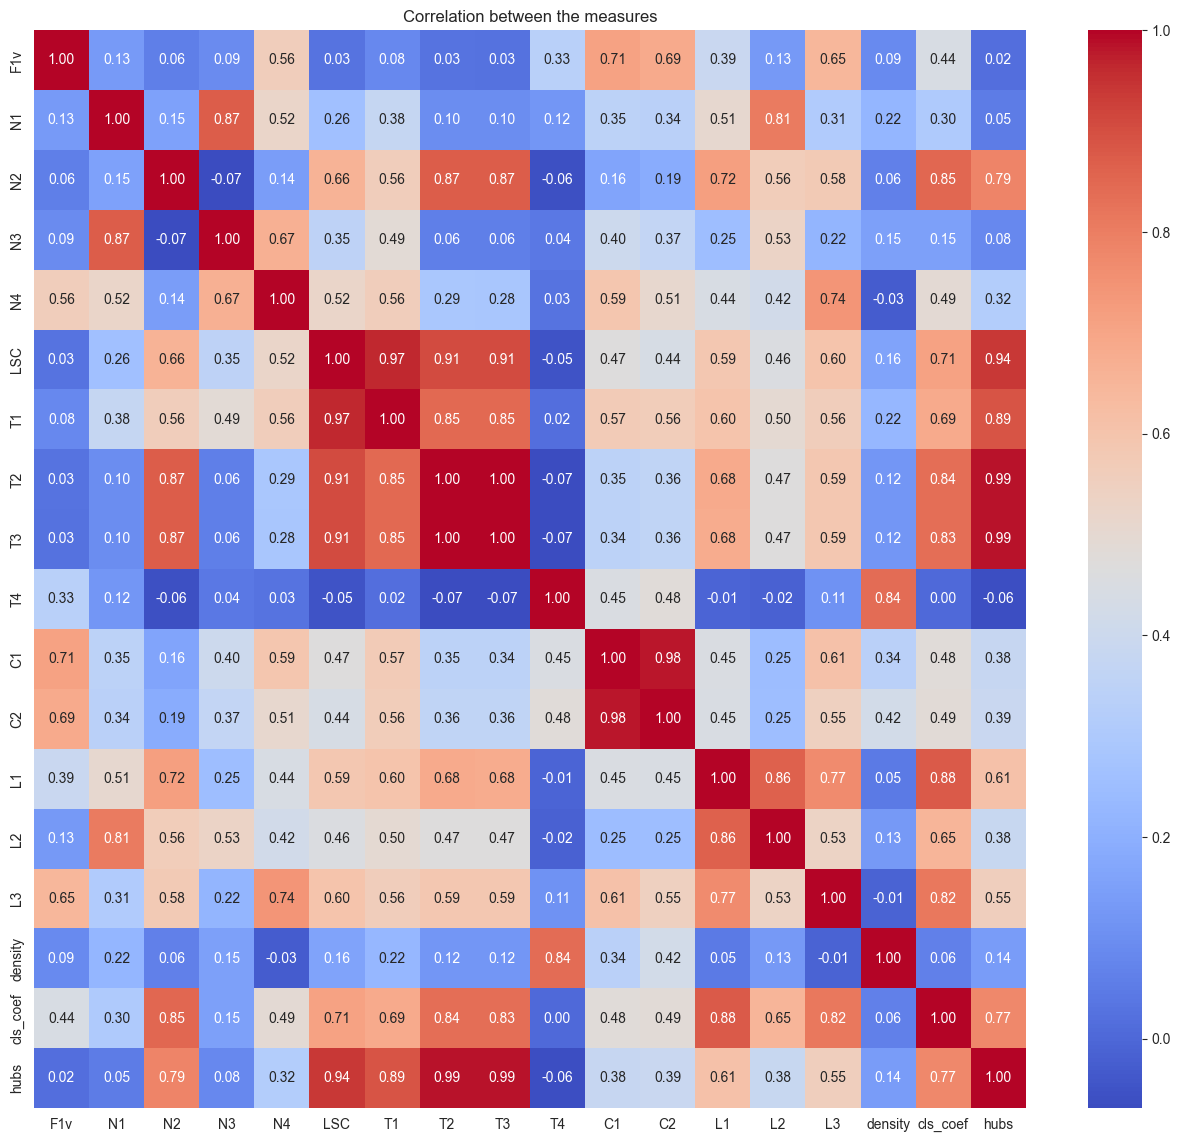

In [12]:
# Correlation matrix
# Fill Nan with the mean values
result_df=result_df.fillna(result_df.mean())
correlation_matrix = result_df.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between the measures')
plt.show()

In [13]:
# Drop useless metrics differences:
result_df.drop(columns=['T2', 'T3', 'T4', 'hubs'], inplace=True)
measures_columns= ['F1v', 'N1', 'N2', 'N3', 'N4', 'LSC', 'T1', 'C1', 'C2', 'L1', 'L2', 'L3', 'density', 'cls_coef']
result_df

,F1v,N1,N2,N3,N4,LSC,T1,C1,C2,L1,L2,L3,density,cls_coef
complete_name,,,,,,,,,,,,,,
S1A,0.002202,0.003554,0.005861,0.008721,0.014005,0.002380,0.009162,0.002438,0.006577,0.003614,0.001723,0.011423,0.000387,0.011439
S1B0,0.004148,0.004926,0.007779,0.001939,0.001739,0.000536,0.005463,0.002438,0.006577,0.007084,0.010609,0.005717,0.000381,0.009832
S1B1,0.004148,0.004926,0.007779,0.001939,0.008303,0.000536,0.005265,0.002438,0.006577,0.007086,0.010605,0.015871,0.000381,0.009832
S1B10,0.004148,0.004926,0.007779,0.001939,0.012625,0.000537,0.005463,0.002438,0.006577,0.006568,0.010003,0.009497,0.000381,0.009832
S1B11,0.004148,0.004926,0.007779,0.001939,0.001462,0.000537,0.005463,0.002438,0.006577,0.006568,0.010003,0.005751,0.000381,0.009832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S4A5,0.018540,0.068859,0.011882,0.037710,0.011974,0.018117,0.057669,0.082928,0.193588,0.014199,0.031718,0.011238,0.284140,0.019200
S4A6,0.021993,0.072291,0.012449,0.039923,0.025887,0.012592,0.058915,0.088427,0.202603,0.015064,0.034328,0.014793,0.364441,0.019322
S4A7,0.031822,0.073278,0.017027,0.038742,0.012630,0.012463,0.059718,0.089384,0.203706,0.012363,0.032324,0.013862,0.391581,0.020223


/var/folders/8s/jw0970rx6838wjmmk1vxlbn00000gn/T/ipykernel_86426/4255220004.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=fontsize)
/var/folders/8s/jw0970rx6838wjmmk1vxlbn00000gn/T/ipykernel_86426/4255220004.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=fontsize)


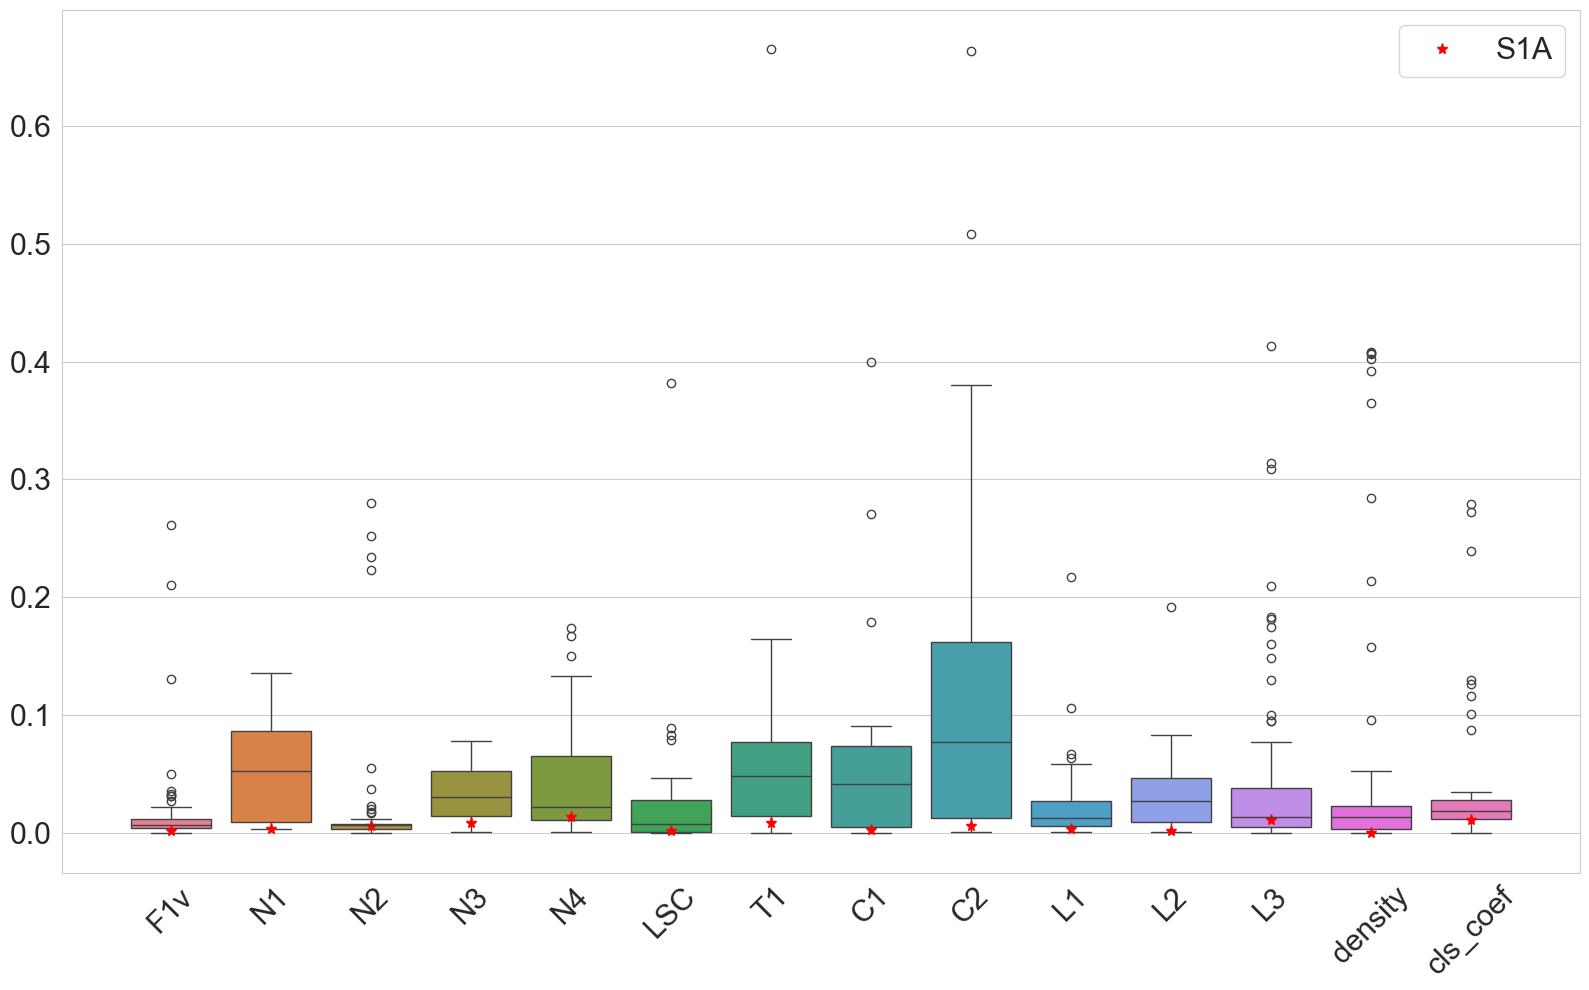

In [14]:
sns.set_style("whitegrid")

# Define the columns of interest
columns_of_interest = measures_columns

# Create the figure
fig, ax = plt.subplots(figsize=(16, 10))

# Create a boxplot for the selected columns
sns.boxplot(data=result_df[columns_of_interest], ax=ax)

# Get the figure size
fig_width, fig_height = fig.get_size_inches()

# Define a scalable font size
base_fontsize = 10
scale_factor = (fig_width + fig_height) / 2  # Average of figure dimensions
fontsize = base_fontsize * (scale_factor / 6)  # Adjusted font size

# Adding points for index 'S1A'
s1a_data = result_df.loc['S1A', columns_of_interest]
for i, value in enumerate(s1a_data):
    ax.plot(i, value, 'r*', markersize=8, label='S1A' if i == 0 else "")

# Set font sizes dynamically
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=fontsize)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=fontsize)
ax.legend(fontsize=fontsize)

# Adjust layout and save
plt.tight_layout()
plt.savefig('plots/complexity_measures_all.pdf', bbox_inches='tight')
plt.show()

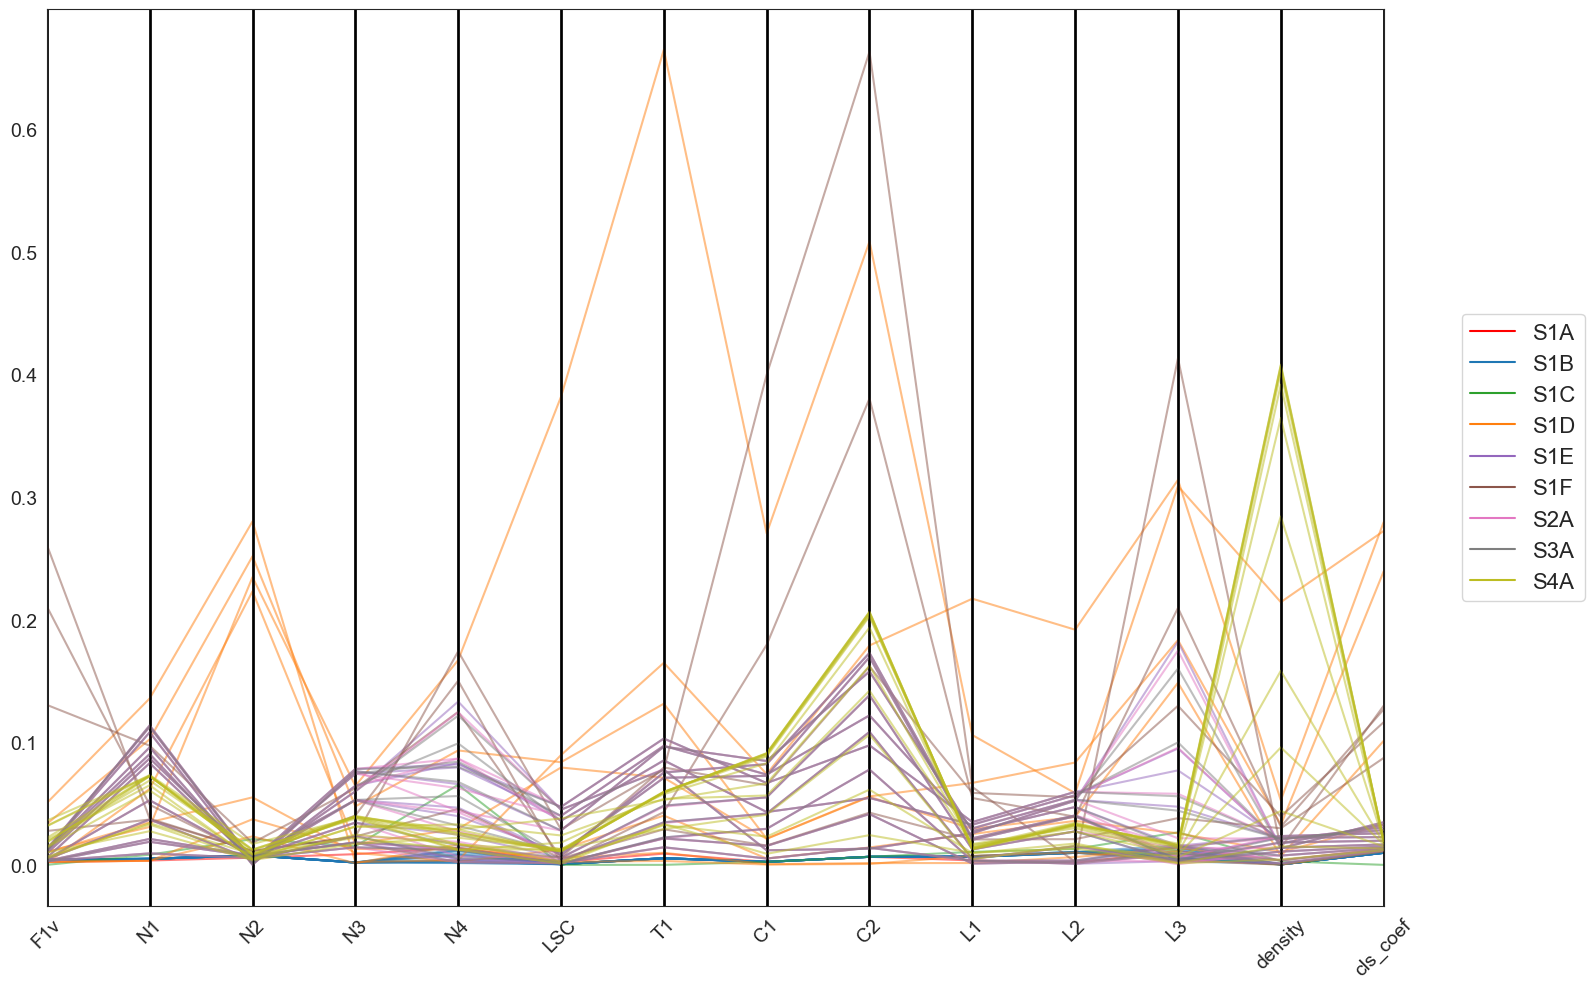

In [50]:
# Create a parallel coordinates plot with colors by experiment type
sns.set_style("white")

# Define base experiments and colors
base_experiments = ['S1A', 'S1B', 'S1C', 'S1D', 'S1E', 'S1F', 'S2A', 'S3A', 'S4A']
colors = {
    'S1A': 'red',
    'S1B': '#1f77b4',  # blue
    'S1C': '#2ca02c',  # green
    'S1D': '#ff7f0e',  # orange
    'S1E': '#9467bd',  # purple
    'S1F': '#8c564b',  # brown
    'S2A': '#e377c2',  # pink
    'S3A': '#7f7f7f',  # gray
    'S4A': '#bcbd22'   # olive
}

# Function to get base experiment
def get_base_experiment(name):
    for base_exp in base_experiments:
        if name.startswith(base_exp):
            return base_exp
    return None

# Add a column for base experiment type
result_df['base_experiment'] = result_df.index.map(get_base_experiment)

plt.figure(figsize=(16, 10))

# Create parallel coordinates plot for each base experiment
for base_exp in base_experiments:
    mask = result_df['base_experiment'] == base_exp
    if mask.any():
        df_subset = result_df[mask].reset_index()
        parallel_coordinates(df_subset, 'complete_name', 
                           cols=columns_of_interest, 
                           color=colors[base_exp], 
                           alpha=0.5)

plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(False)

# Create custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color=colors[exp], label=exp) 
                  for exp in base_experiments]
plt.legend(handles=legend_elements, 
          loc='center left', 
          bbox_to_anchor=(1.05, 0.5),
           fontsize=16)

plt.tight_layout()
plt.savefig('plots/cm_parallel_coordinates.pdf', 
            bbox_inches='tight')
plt.show()



In [16]:
result_df.to_csv('results/df_complexity_measures_sync_diff.csv')
dict_scenario_names = {'S1A': 'No bias', 'S1B': 'Measurement Bias in R', 'S1C': 'R Ommited', 'S1D': 'Undersampling', 
                       'S1E': 'Measurement bias in Y', 'S1F': 'Conditional undersampling on R', 'S2A': 'Historical bias on R', 
                       'S3A': 'Historical bias on Y', 'S4A': 'Historical bias on Q'}


/var/folders/8s/jw0970rx6838wjmmk1vxlbn00000gn/T/ipykernel_86426/2185542595.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=fontsize)
/var/folders/8s/jw0970rx6838wjmmk1vxlbn00000gn/T/ipykernel_86426/2185542595.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=fontsize)
/var/folders/8s/jw0970rx6838wjmmk1vxlbn00000gn/T/ipykernel_86426/2185542595.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=fontsize)
/var/folders/8s/jw0970rx6838wjmmk1vxlbn00000gn/T/ipykernel_86426/2185542595.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of

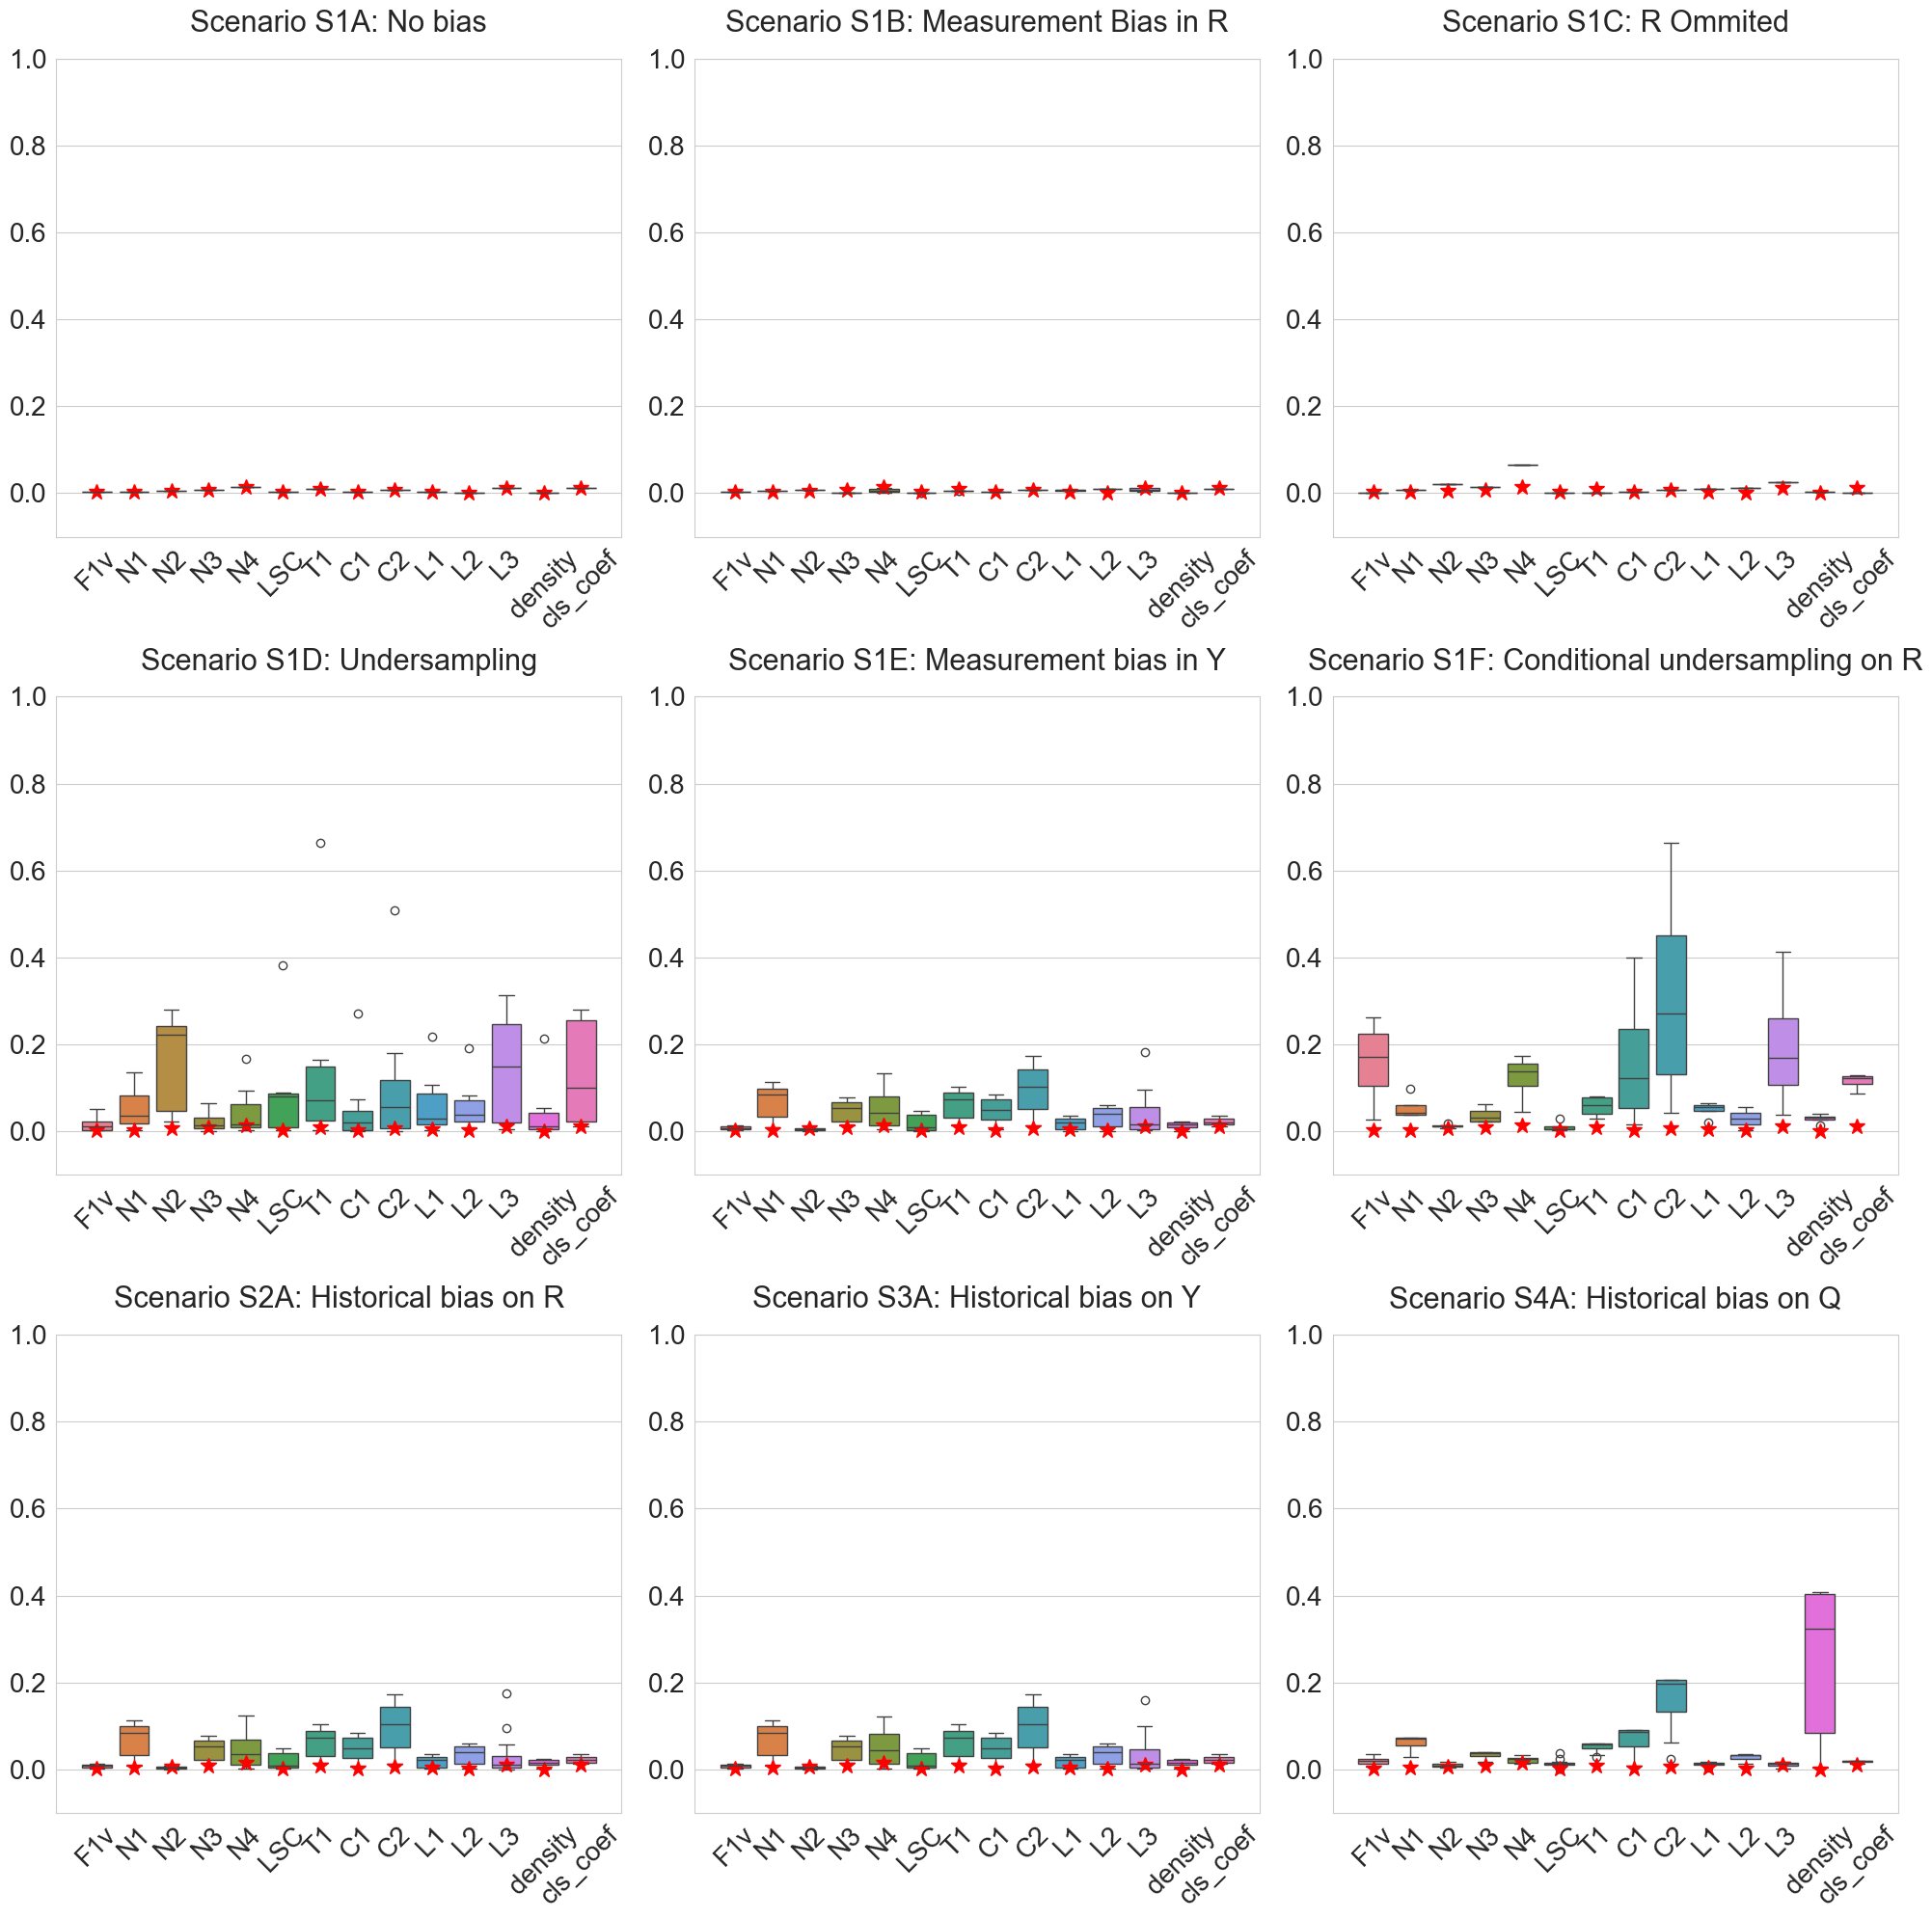

In [33]:
sns.set_style("whitegrid")

# Define base experiments
base_experiments = ['S1A', 'S1B', 'S1C', 'S1D', 'S1E', 'S1F', 'S2A', 'S3A', 'S4A']

# Calculate grid dimensions
n_scenarios = len(base_experiments)
n_rows, n_cols = 3, 3

# Create figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Get figure size for scaling
fig_width, fig_height = fig.get_size_inches()
base_fontsize = 10
scale_factor = (fig_width + fig_height) / 2  # Average figure dimensions
fontsize = base_fontsize * (scale_factor / 10)  # Adjusted font size

# Get S1A reference data once
s1a_data = result_df.loc['S1A', measures_columns]

# Create a boxplot for each scenario
for idx, scenario in enumerate(base_experiments):
    ax = axes[idx]
    
    # Get data for current scenario
    scenario_mask = result_df.index.str.startswith(scenario)
    scenario_data = result_df[scenario_mask][measures_columns]
    
    # Set y-axis limits
    ax.set_ylim(-0.1, 1)
    
    # Create boxplot
    sns.boxplot(data=scenario_data, ax=ax)
    
    # Add S1A reference points to every plot
    for i, value in enumerate(s1a_data):
        ax.plot(i, value, 'r*', markersize=12, label='S1A reference' if idx == 0 else '')
    
    # Customize subplot
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=fontsize)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=fontsize)
    ax.set_title(f'Scenario {scenario}: {dict_scenario_names[scenario]}', fontsize=fontsize + 2, pad=20)
    
    # Only show y-label for leftmost plots
    if idx % n_cols != 0:
        ax.set_ylabel('')
    

# Hide unused subplots if any
for idx in range(n_scenarios, n_rows * n_cols):
    fig.delaxes(axes[idx])

# Adjust layout
plt.tight_layout()

# Save figure
plt.savefig('plots/cm_boxplot_by_Scenario.pdf', bbox_inches='tight')
plt.show()

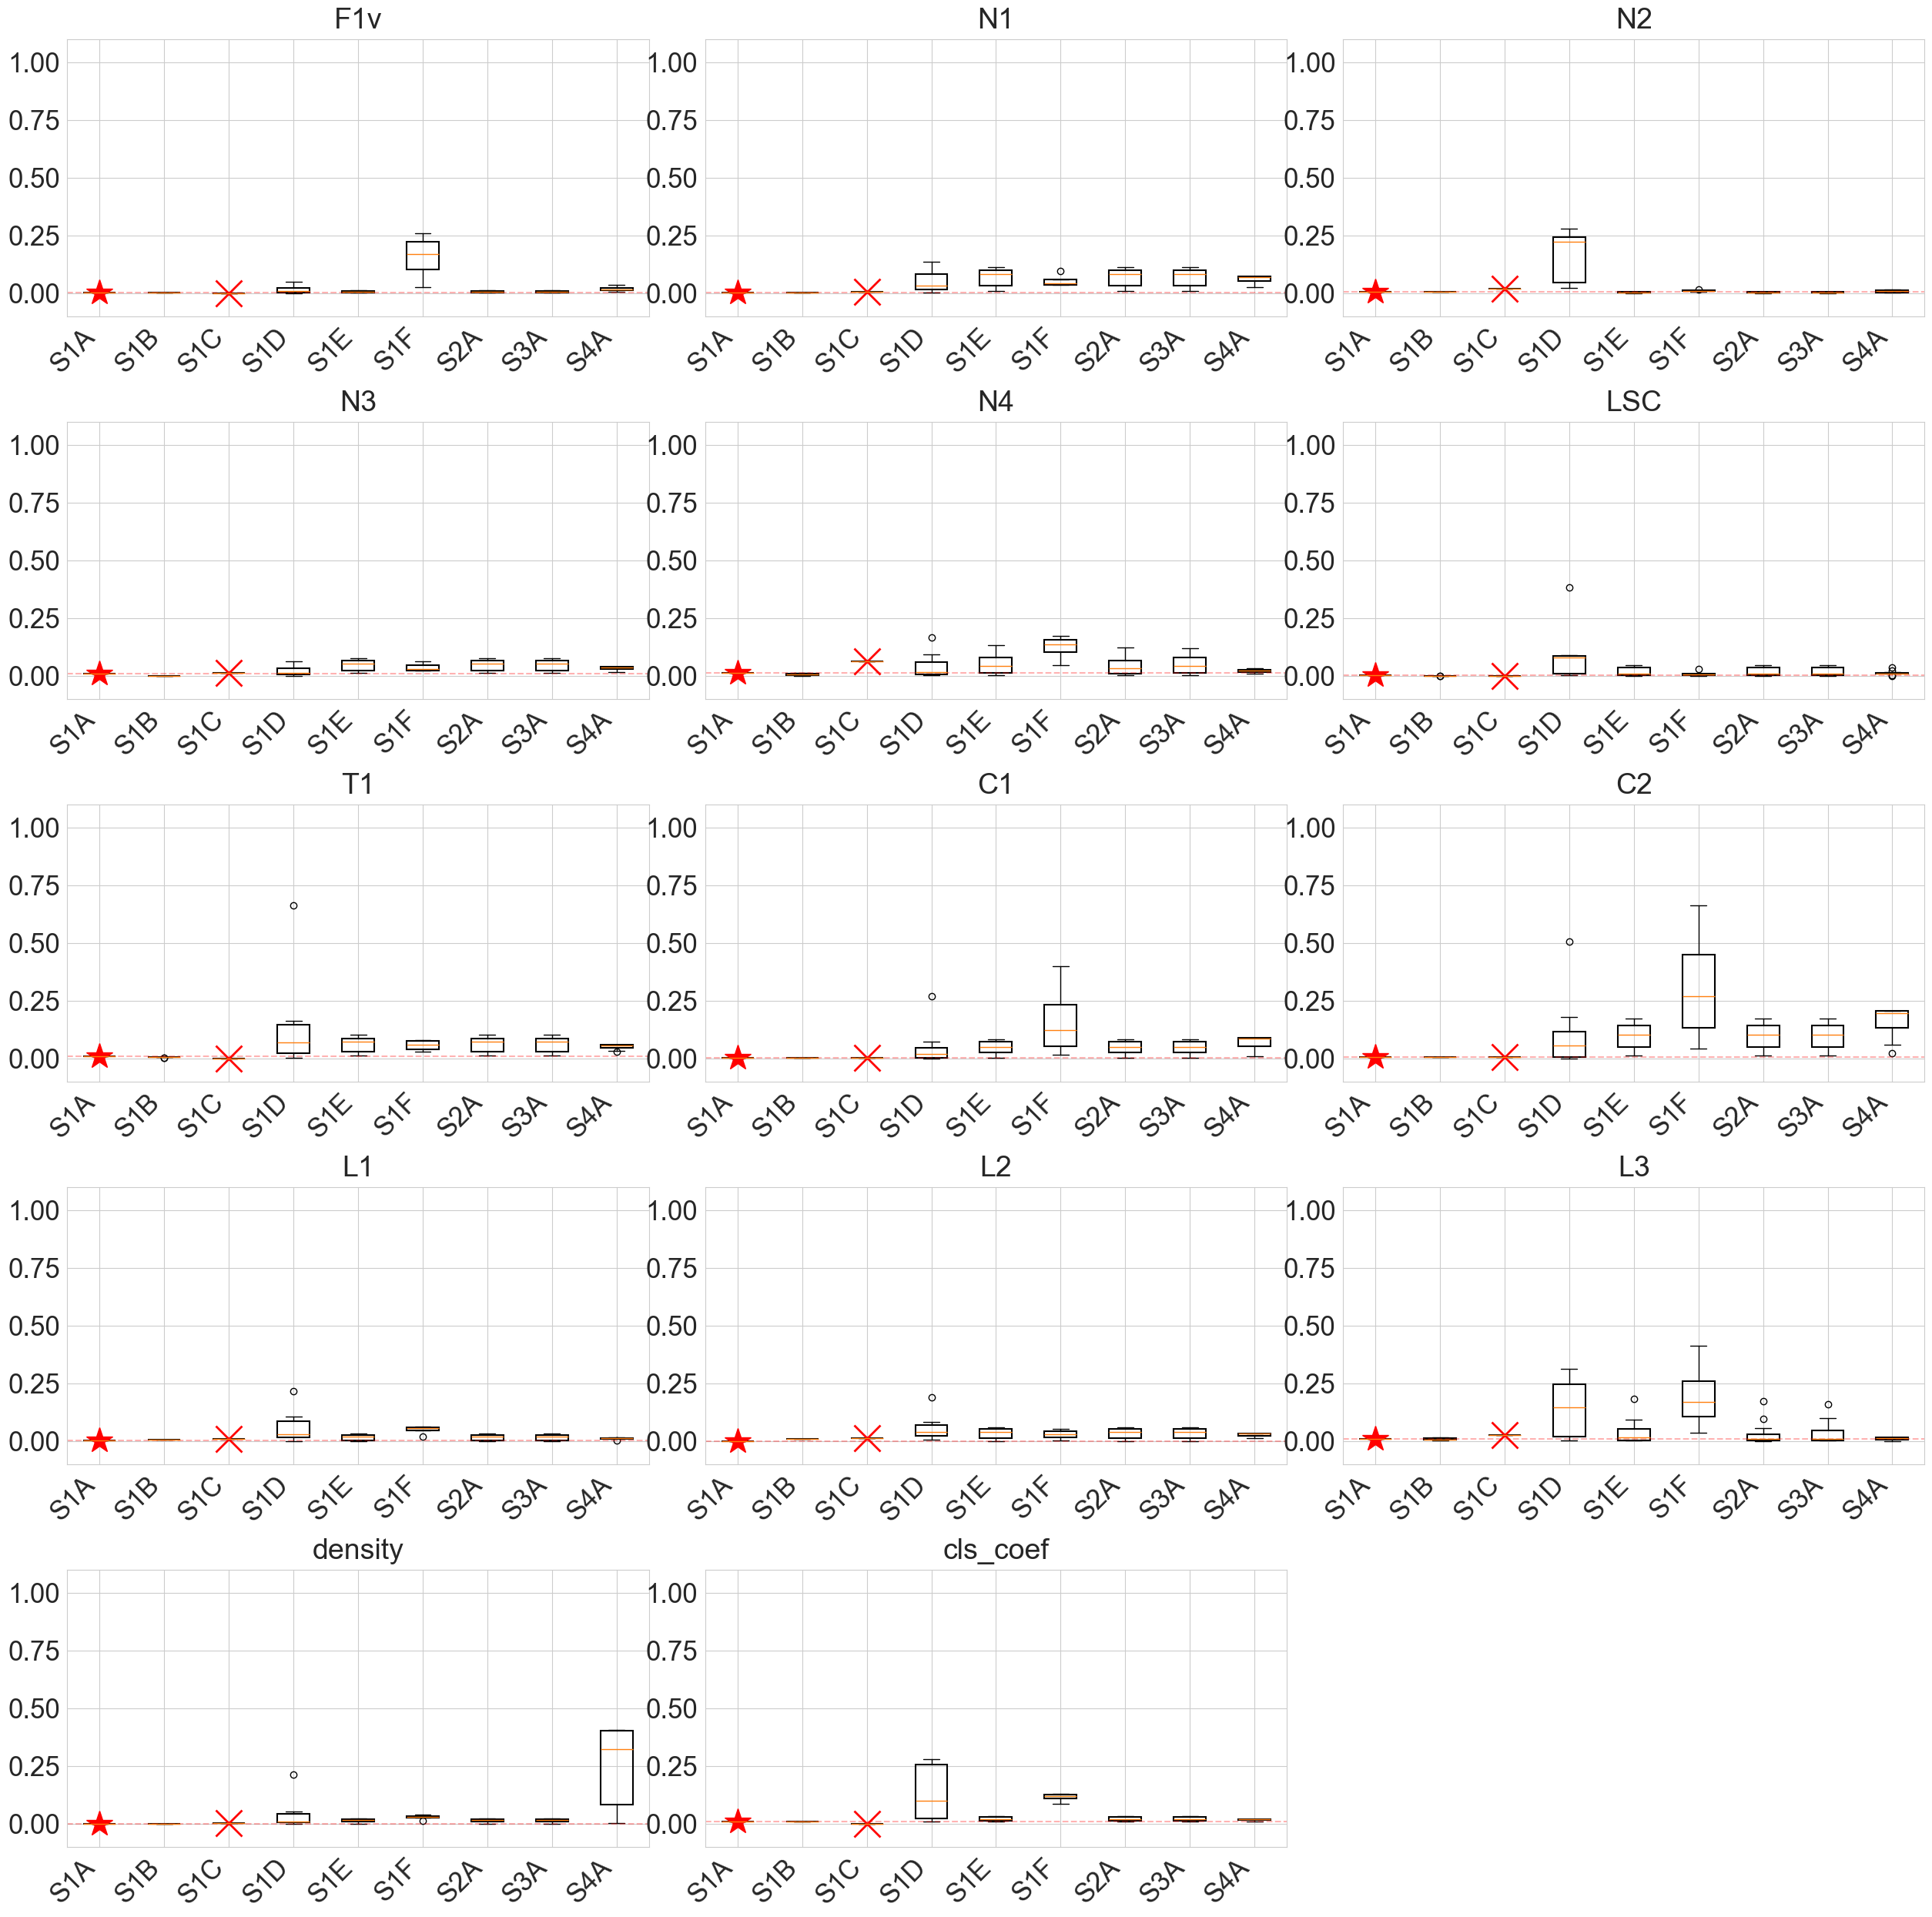

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Define base experiments
base_experiments = ['S1A', 'S1B', 'S1C', 'S1D', 'S1E', 'S1F', 'S2A', 'S3A', 'S4A']

# Calculate grid dimensions
n_measures = len(measures_columns)
n_rows, n_cols = 5, 3  # Adjust grid layout

# Create figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 25))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Get figure size for dynamic scaling
fig_width, fig_height = fig.get_size_inches()
base_fontsize = 10
scale_factor = (fig_width + fig_height) / 2  # Average figure dimensions
fontsize = base_fontsize * (scale_factor / 10)  # Adjusted font size

# Create a list to store data for each base experiment
for idx, measure in enumerate(measures_columns):
    if idx < len(axes):  # Make sure we don't exceed the number of subplots
        ax = axes[idx]
        
        # Create a list to store data for each base experiment
        data_to_plot = []
        for exp in base_experiments:
            # Get all values for this measure where index starts with exp
            values = result_df[result_df.index.str.startswith(exp)][measure]
            data_to_plot.append(values)
        
        # Create boxplot
        bp = ax.boxplot(data_to_plot, patch_artist=True)
        
        # Make boxplots transparent
        for box in bp['boxes']:
            box.set(facecolor='none', edgecolor='black', linewidth=1.5)  # Transparent fill, black outline

        
        # Set y-axis limits
        ax.set_ylim(-0.1, 1.1)
        
        # Customize subplot
        ax.set_xticklabels(base_experiments, rotation=45, ha='right', fontsize=fontsize)
        ax.set_title(measure, fontsize=fontsize + 2, pad=10)
        ax.tick_params(axis='y', labelsize=fontsize)

        # Mark S1A value if it exists
        if 'S1A' in result_df.index:
            s1a_value = result_df.loc['S1A', measure]
            ax.axhline(y=s1a_value, color='r', linestyle='--', alpha=0.3)
            ax.plot(1, s1a_value, 'r*', markersize=fontsize)  # 1 is the position of S1A
            
        # Mark S1C value if it exists
        if 'S1C' in result_df.index:
            s1c_value = result_df.loc['S1C', measure]
            ax.plot(3, s1c_value, 'rx', markersize=fontsize, markeredgewidth=2)  # 3 is the position of S1C

# Remove any empty subplots
for idx in range(len(measures_columns), len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout
plt.tight_layout()

# Save figure
plt.savefig('plots/cm_boxplot_by_measure.pdf', bbox_inches='tight')
plt.show()


In [21]:
result_df.drop(columns='base_experiment', inplace=True)
result_df

,F1v,N1,N2,N3,N4,LSC,T1,C1,C2,L1,L2,L3,density,cls_coef
complete_name,,,,,,,,,,,,,,
S1A,0.002202,0.003554,0.005861,0.008721,0.014005,0.002380,0.009162,0.002438,0.006577,0.003614,0.001723,0.011423,0.000387,0.011439
S1B0,0.004148,0.004926,0.007779,0.001939,0.001739,0.000536,0.005463,0.002438,0.006577,0.007084,0.010609,0.005717,0.000381,0.009832
S1B1,0.004148,0.004926,0.007779,0.001939,0.008303,0.000536,0.005265,0.002438,0.006577,0.007086,0.010605,0.015871,0.000381,0.009832
S1B10,0.004148,0.004926,0.007779,0.001939,0.012625,0.000537,0.005463,0.002438,0.006577,0.006568,0.010003,0.009497,0.000381,0.009832
S1B11,0.004148,0.004926,0.007779,0.001939,0.001462,0.000537,0.005463,0.002438,0.006577,0.006568,0.010003,0.005751,0.000381,0.009832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S4A5,0.018540,0.068859,0.011882,0.037710,0.011974,0.018117,0.057669,0.082928,0.193588,0.014199,0.031718,0.011238,0.284140,0.019200
S4A6,0.021993,0.072291,0.012449,0.039923,0.025887,0.012592,0.058915,0.088427,0.202603,0.015064,0.034328,0.014793,0.364441,0.019322
S4A7,0.031822,0.073278,0.017027,0.038742,0.012630,0.012463,0.059718,0.089384,0.203706,0.012363,0.032324,0.013862,0.391581,0.020223


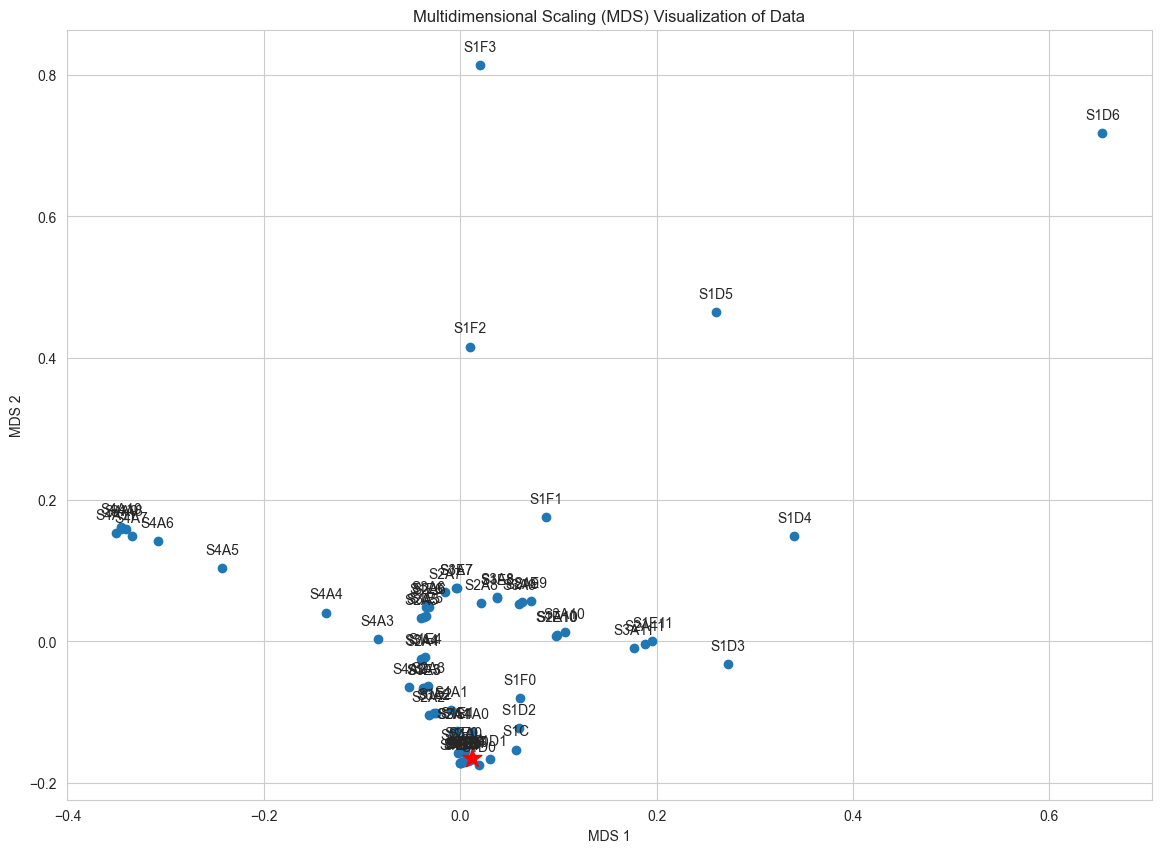

In [22]:
# Initialize the MDS model
mds = MDS(n_components=2, random_state=42)

# Fit the MDS model and transform the data into 2D
mds_data = mds.fit_transform(result_df)

# Create a scatter plot for the 2D representation of the data
plt.figure(figsize=(14, 10))
plt.scatter(mds_data[:, 0], mds_data[:, 1])



# Annotate the points with the index names
for i, name in enumerate(result_df.index):
    plt.annotate(name, (mds_data[i, 0], mds_data[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')
    if name == "S1A":
        specific_index = i
        
# Plot the specific point with a different marker        
plt.scatter(mds_data[specific_index, 0], mds_data[specific_index, 1], 
            marker='*',  # Different marker shape
            s=200,      # Larger size
            c='red',    # Different color
            label='S1A')

plt.xlabel('MDS 1')
plt.ylabel('MDS 2')
plt.title('Multidimensional Scaling (MDS) Visualization of Data')
plt.show()

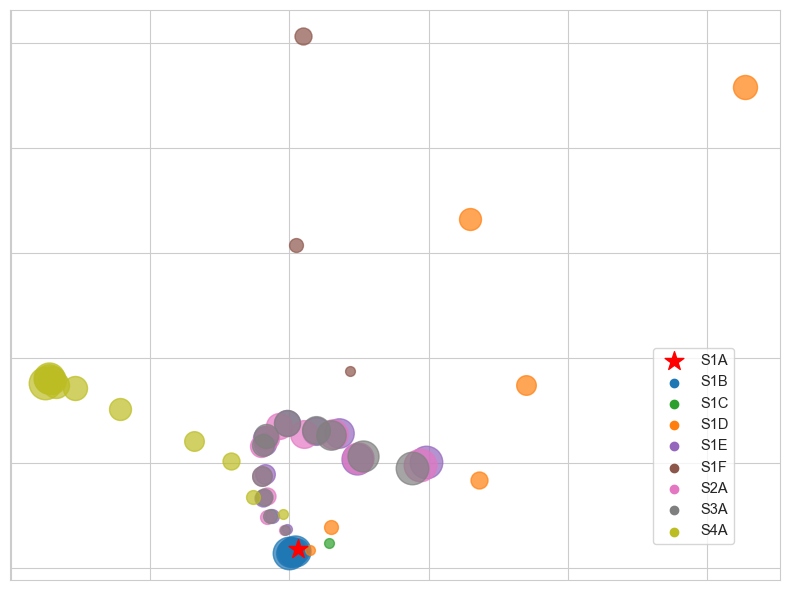

In [31]:
sns.set_style("whitegrid")

# Initialize the MDS model
mds = MDS(n_components=2, random_state=42)

# Fit the MDS model and transform the data into 2D
mds_data = mds.fit_transform(result_df)

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))

# Dynamic Font Scaling
fig_width, fig_height = fig.get_size_inches()
base_fontsize = 10
scale_factor = (fig_width + fig_height) / 2
fontsize = base_fontsize * (scale_factor / 10)  # Scale proportionally

# Define a consistent color scheme
base_experiments = ['S1A', 'S1B', 'S1C', 'S1D', 'S1E', 'S1F', 'S2A', 'S3A', 'S4A']
colors = {
    'S1A': 'red', 'S1B': '#1f77b4', 'S1C': '#2ca02c', 'S1D': '#ff7f0e',
    'S1E': '#9467bd', 'S1F': '#8c564b', 'S2A': '#e377c2', 'S3A': '#7f7f7f', 'S4A': '#bcbd22'
}

# Function to get numeric value from experiment name
def get_numeric_value(name):
    base_exp = next((exp for exp in base_experiments if name.startswith(exp)), None)
    numeric_part = name[len(base_exp):].strip('_') if base_exp else ''
    return float(numeric_part) if numeric_part.isnumeric() else 1

# Calculate sizes based on numeric values
sizes = np.array([get_numeric_value(name) * 50 for name in result_df.index])

# Create legend handles
legend_elements = [
    plt.scatter([], [], marker='*', c='red', s=200, label='S1A')
] + [
    plt.scatter([], [], marker='o', c=[colors[exp]], label=exp) for exp in base_experiments if exp != 'S1A'
]

# First plot all points except S1A
for i, name in enumerate(result_df.index):
    base_exp = next((exp for exp in base_experiments if name.startswith(exp)), None)
    if base_exp and base_exp != 'S1A':
        ax.scatter(mds_data[i, 0], mds_data[i, 1], marker='o', s=sizes[i], c=[colors[base_exp]], alpha=0.7)

# Then plot S1A points last (on top)
for i, name in enumerate(result_df.index):
    if name.startswith('S1A'):
        ax.scatter(mds_data[i, 0], mds_data[i, 1], marker='*', s=200, c='red', alpha=1.0)

# Remove axis numbering
ax.set_xticklabels([])
ax.set_yticklabels([])
#ax.set_frame_on(False)  # Hide the plot frame

# Move legend inside bottom right
ax.legend(handles=legend_elements, loc='lower right', bbox_to_anchor=(0.95, 0.05), fontsize=fontsize*1.5)

# Adjust layout
plt.tight_layout()
plt.savefig('plots/cm_MDS.pdf', bbox_inches='tight', dpi=300)
plt.show()

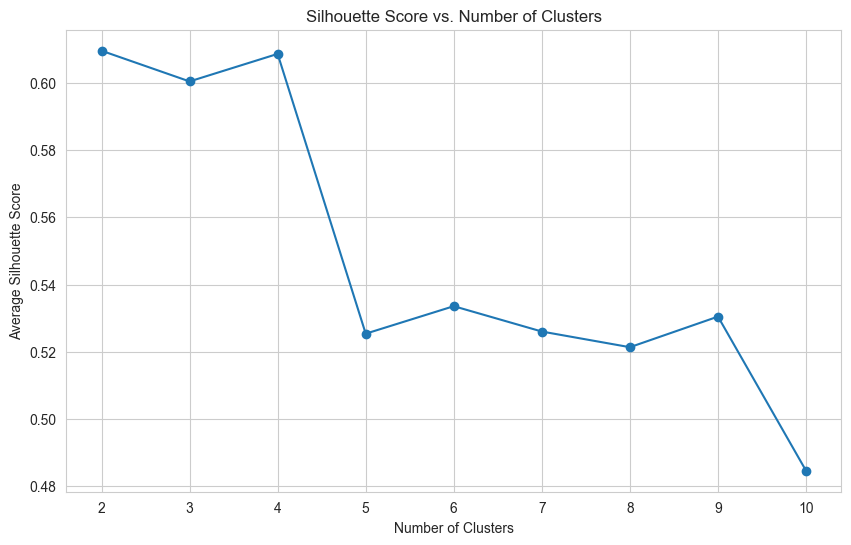

(2, np.float64(0.6095584262515837))

In [25]:
# Initialize variables to store results
cluster_range = range(2, 11)  # Test from 2 to 10 clusters
silhouette_scores = []

# Loop through different numbers of clusters and calculate silhouette scores
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(result_df)
    silhouette_avg = silhouette_score(result_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the results to find the optimal number of clusters based on silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Average Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.show()

# Find the number of clusters that gives the highest silhouette score
best_n_clusters = cluster_range[np.argmax(silhouette_scores)]
best_silhouette_score = max(silhouette_scores)

best_n_clusters, best_silhouette_score

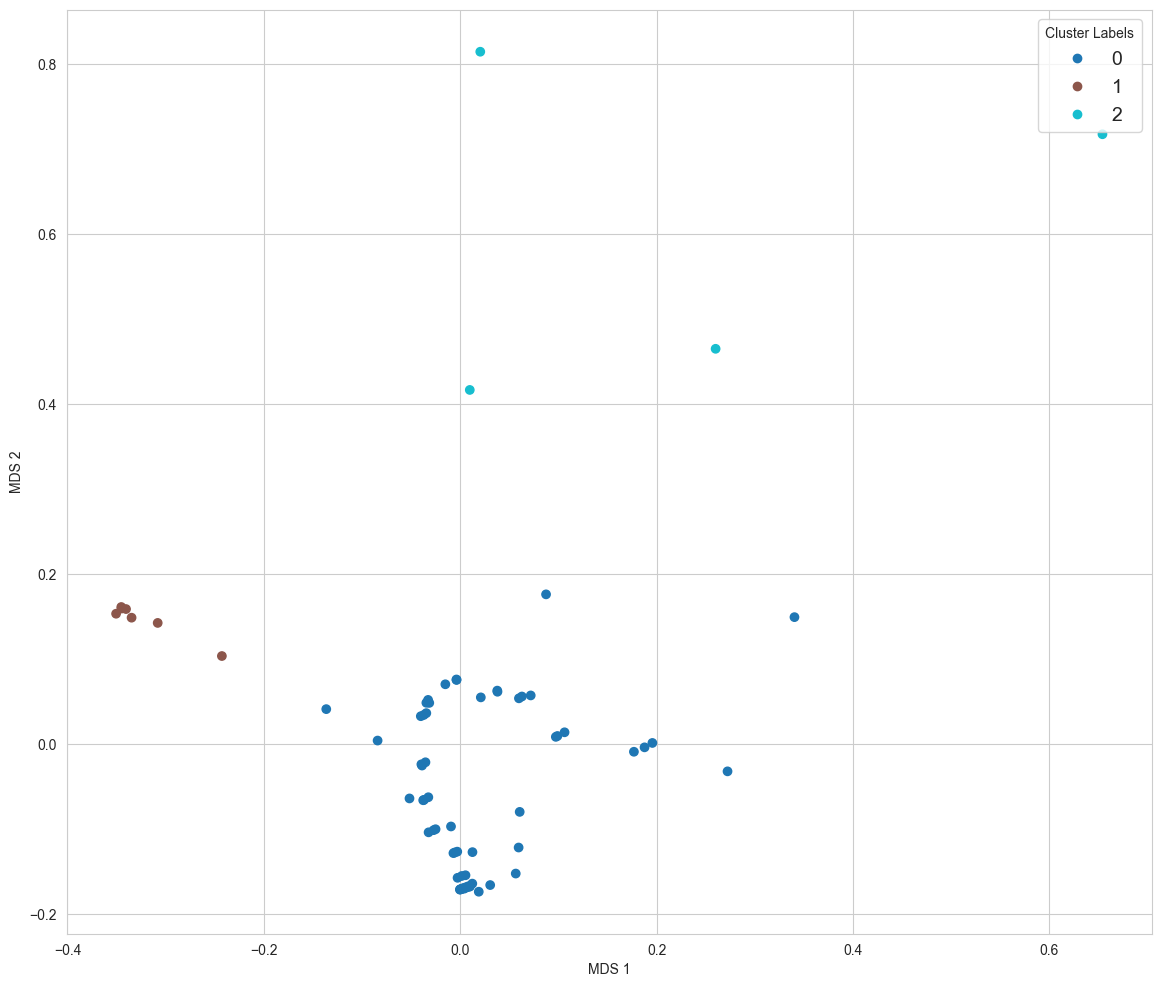

In [26]:
# Initialize the Clustering model
kmeans = KMeans(n_clusters= 3,  random_state=42)

columns = measures_columns

# Fit the model and predict cluster labels
cluster_labels = kmeans.fit_predict(result_df[columns], )

# Initialize the MDS model
mds = MDS(n_components=2, random_state=42)
# Fit the MDS model and transform the data into 2D
mds_data = mds.fit_transform(result_df[columns])

# Create a scatter plot for the 2D representation of the data with cluster coloring
plt.figure(figsize=(14, 12))
scatter = plt.scatter(mds_data[:, 0], mds_data[:, 1], c=cluster_labels, cmap='tab10')

# Annotate the points with the index names
# for i, name in enumerate(result_df.index):
#    plt.annotate(name, (mds_data[i, 0], mds_data[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')

# Add colorbar to indicate cluster labels
# cbar = plt.colorbar(scatter, ticks=np.arange(5))
# cbar.set_label('Cluster Label')

# Creating a legend with the cluster labels
plt.legend(handles=scatter.legend_elements()[0], title="Cluster Labels", labels=set(cluster_labels), fontsize=14)

plt.xlabel('MDS 1')
plt.ylabel('MDS 2')
# plt.title('Multidimensional Scaling (MDS) Visualization with Kmeans Clustering')

plt.savefig("plots/cm_clustering_MDS.pdf")

plt.show()

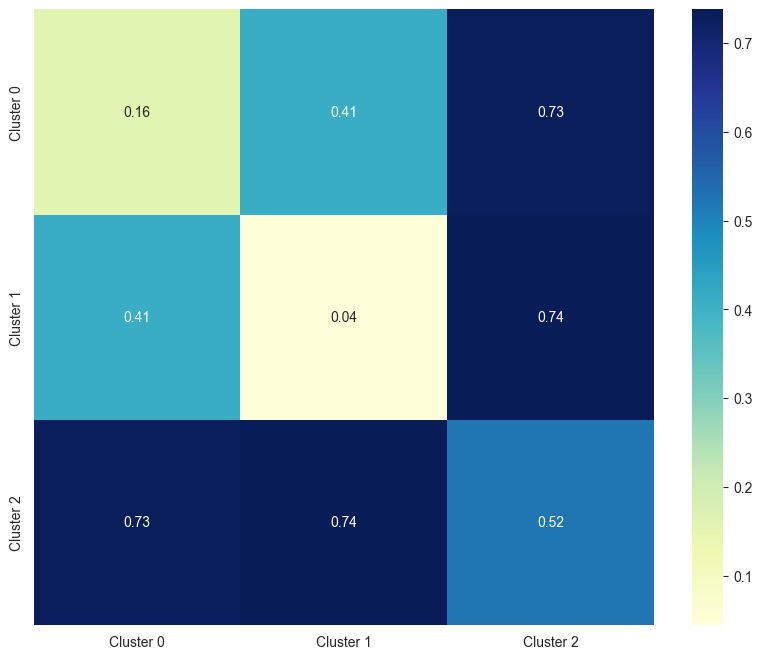

In [27]:
n_clusters = 3

# Calculate pairwise distances between all data points
pairwise_dist = pairwise_distances(result_df)

# Initialize an empty adjacency matrix for the clusters
cluster_adjacency = np.zeros((n_clusters, n_clusters))

# Calculate the average distance between members of each pair of clusters
for i in range(n_clusters):
    for j in range(n_clusters):
        cluster_i_members = np.where(cluster_labels == i)[0]
        cluster_j_members = np.where(cluster_labels == j)[0]
        avg_distance = np.mean(pairwise_dist[cluster_i_members, :][:, cluster_j_members])
        cluster_adjacency[i, j] = avg_distance

# Create a DataFrame from the adjacency matrix
cluster_adjacency_df = pd.DataFrame(cluster_adjacency, columns=[f"Cluster {i}" for i in range(n_clusters)], index=[f"Cluster {i}" for i in range(n_clusters)])

# Visualize the adjacency matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cluster_adjacency_df, annot=True, cmap="YlGnBu", fmt=".2f")
#plt.title("Cluster Adjacency Matrix Based on Average Pairwise Distances")
plt.savefig("plots/cm_clustering_adj.pdf")
plt.show()

In [28]:
cluster_adjacency_df

,Cluster 0,Cluster 1,Cluster 2
Cluster 0,0.156397,0.412403,0.733135
Cluster 1,0.412403,0.044198,0.737926
Cluster 2,0.733135,0.737926,0.522606


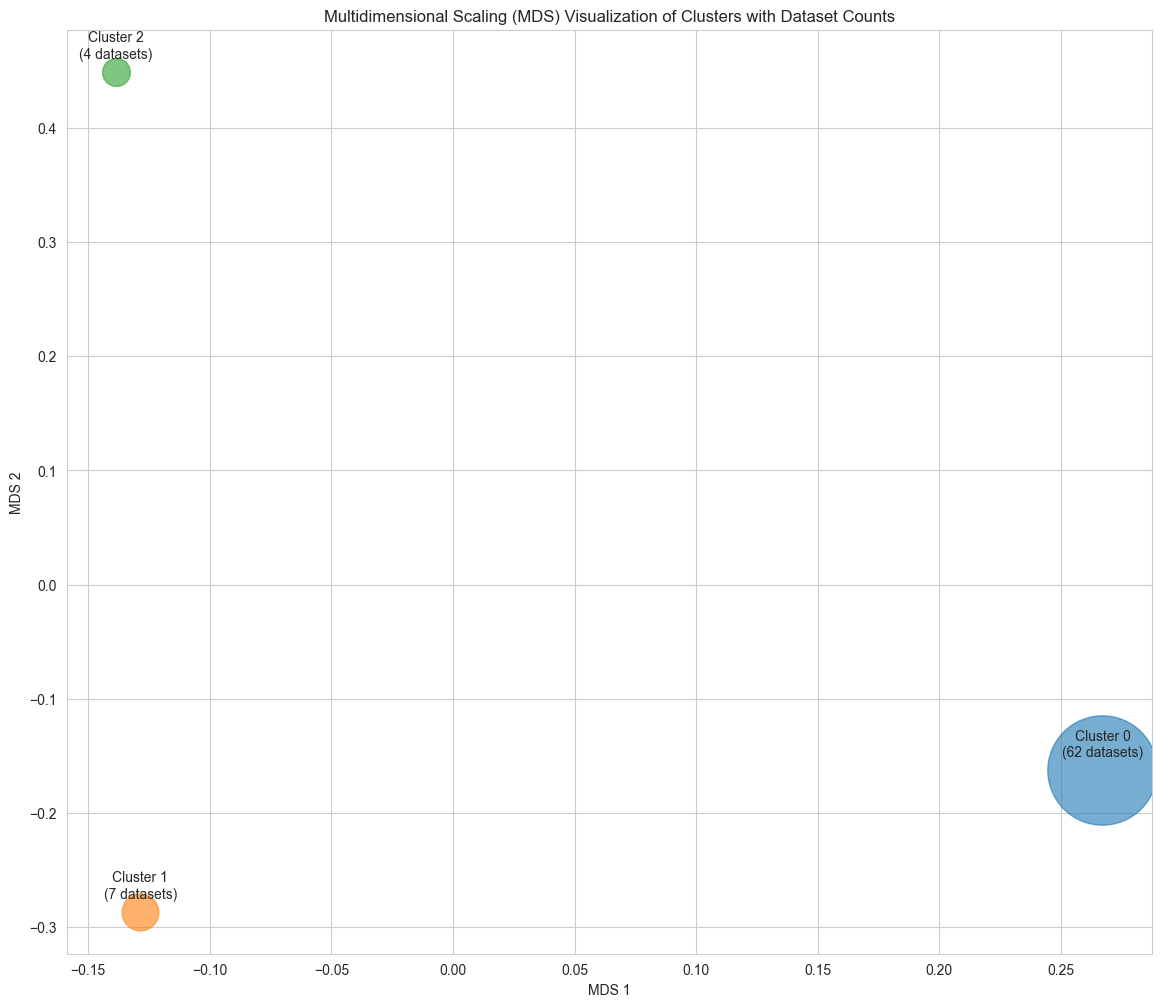

In [29]:
# Count the number of datasets in each cluster
cluster_counts = np.bincount(cluster_labels)

# Perform MDS using the precomputed dissimilarity matrix (cluster adjacency matrix)
mds_cluster = MDS(n_components=2, random_state=42, dissimilarity='precomputed')

# Fit the MDS model and transform the cluster adjacency matrix into 2D
mds_cluster_data = mds_cluster.fit_transform(cluster_adjacency)

# Get the colors from the 'tab10' colormap
pastel_colors = plt.cm.tab10(np.linspace(0, 1, 9))

# Create a scatter plot for the 2D representation of the clusters
plt.figure(figsize=(14, 12))
for i, count in enumerate(cluster_counts):
    plt.scatter(mds_cluster_data[i, 0], mds_cluster_data[i, 1], 
                s=count*100, 
                color=pastel_colors[i], 
                label=f"Cluster {i}", 
                alpha=0.6)

# Annotate the points with the cluster names and dataset counts
for i, name in enumerate(cluster_adjacency_df.index):
    plt.annotate(f"{name}\n({cluster_counts[i]} datasets)",
                 (mds_cluster_data[i, 0], mds_cluster_data[i, 1]),
                 textcoords="offset points",
                 xytext=(0, 10),
                 ha='center')

plt.xlabel('MDS 1')
plt.ylabel('MDS 2')
plt.title('Multidimensional Scaling (MDS) Visualization of Clusters with Dataset Counts')

plt.savefig("plots/cm_clustering_groups_MDS.pdf", bbox_inches='tight')
plt.show()

In [30]:
result_df['Cluster'] = cluster_labels
result_df

,F1v,N1,N2,N3,N4,LSC,T1,C1,C2,L1,L2,L3,density,cls_coef,Cluster
complete_name,,,,,,,,,,,,,,,
S1A,0.002202,0.003554,0.005861,0.008721,0.014005,0.002380,0.009162,0.002438,0.006577,0.003614,0.001723,0.011423,0.000387,0.011439,0
S1B0,0.004148,0.004926,0.007779,0.001939,0.001739,0.000536,0.005463,0.002438,0.006577,0.007084,0.010609,0.005717,0.000381,0.009832,0
S1B1,0.004148,0.004926,0.007779,0.001939,0.008303,0.000536,0.005265,0.002438,0.006577,0.007086,0.010605,0.015871,0.000381,0.009832,0
S1B10,0.004148,0.004926,0.007779,0.001939,0.012625,0.000537,0.005463,0.002438,0.006577,0.006568,0.010003,0.009497,0.000381,0.009832,0
S1B11,0.004148,0.004926,0.007779,0.001939,0.001462,0.000537,0.005463,0.002438,0.006577,0.006568,0.010003,0.005751,0.000381,0.009832,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S4A5,0.018540,0.068859,0.011882,0.037710,0.011974,0.018117,0.057669,0.082928,0.193588,0.014199,0.031718,0.011238,0.284140,0.019200,1
S4A6,0.021993,0.072291,0.012449,0.039923,0.025887,0.012592,0.058915,0.088427,0.202603,0.015064,0.034328,0.014793,0.364441,0.019322,1
S4A7,0.031822,0.073278,0.017027,0.038742,0.012630,0.012463,0.059718,0.089384,0.203706,0.012363,0.032324,0.013862,0.391581,0.020223,1


In [31]:
# copied
results_copy = result_df.copy()
results_copy.drop('Cluster', axis=1, inplace=True)
results_copy.reset_index(inplace=True)
results_copy

,complete_name,F1v,N1,N2,N3,N4,LSC,T1,C1,C2,L1,L2,L3,density,cls_coef
0,S1A,0.002202,0.003554,0.005861,0.008721,0.014005,0.002380,0.009162,0.002438,0.006577,0.003614,0.001723,0.011423,0.000387,0.011439
1,S1B0,0.004148,0.004926,0.007779,0.001939,0.001739,0.000536,0.005463,0.002438,0.006577,0.007084,0.010609,0.005717,0.000381,0.009832
2,S1B1,0.004148,0.004926,0.007779,0.001939,0.008303,0.000536,0.005265,0.002438,0.006577,0.007086,0.010605,0.015871,0.000381,0.009832
3,S1B10,0.004148,0.004926,0.007779,0.001939,0.012625,0.000537,0.005463,0.002438,0.006577,0.006568,0.010003,0.009497,0.000381,0.009832
4,S1B11,0.004148,0.004926,0.007779,0.001939,0.001462,0.000537,0.005463,0.002438,0.006577,0.006568,0.010003,0.005751,0.000381,0.009832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,S4A5,0.018540,0.068859,0.011882,0.037710,0.011974,0.018117,0.057669,0.082928,0.193588,0.014199,0.031718,0.011238,0.284140,0.019200
69,S4A6,0.021993,0.072291,0.012449,0.039923,0.025887,0.012592,0.058915,0.088427,0.202603,0.015064,0.034328,0.014793,0.364441,0.019322
70,S4A7,0.031822,0.073278,0.017027,0.038742,0.012630,0.012463,0.059718,0.089384,0.203706,0.012363,0.032324,0.013862,0.391581,0.020223
71,S4A8,0.031543,0.072444,0.008755,0.039497,0.026253,0.010907,0.059479,0.090321,0.205154,0.013782,0.033688,0.015780,0.401999,0.020164


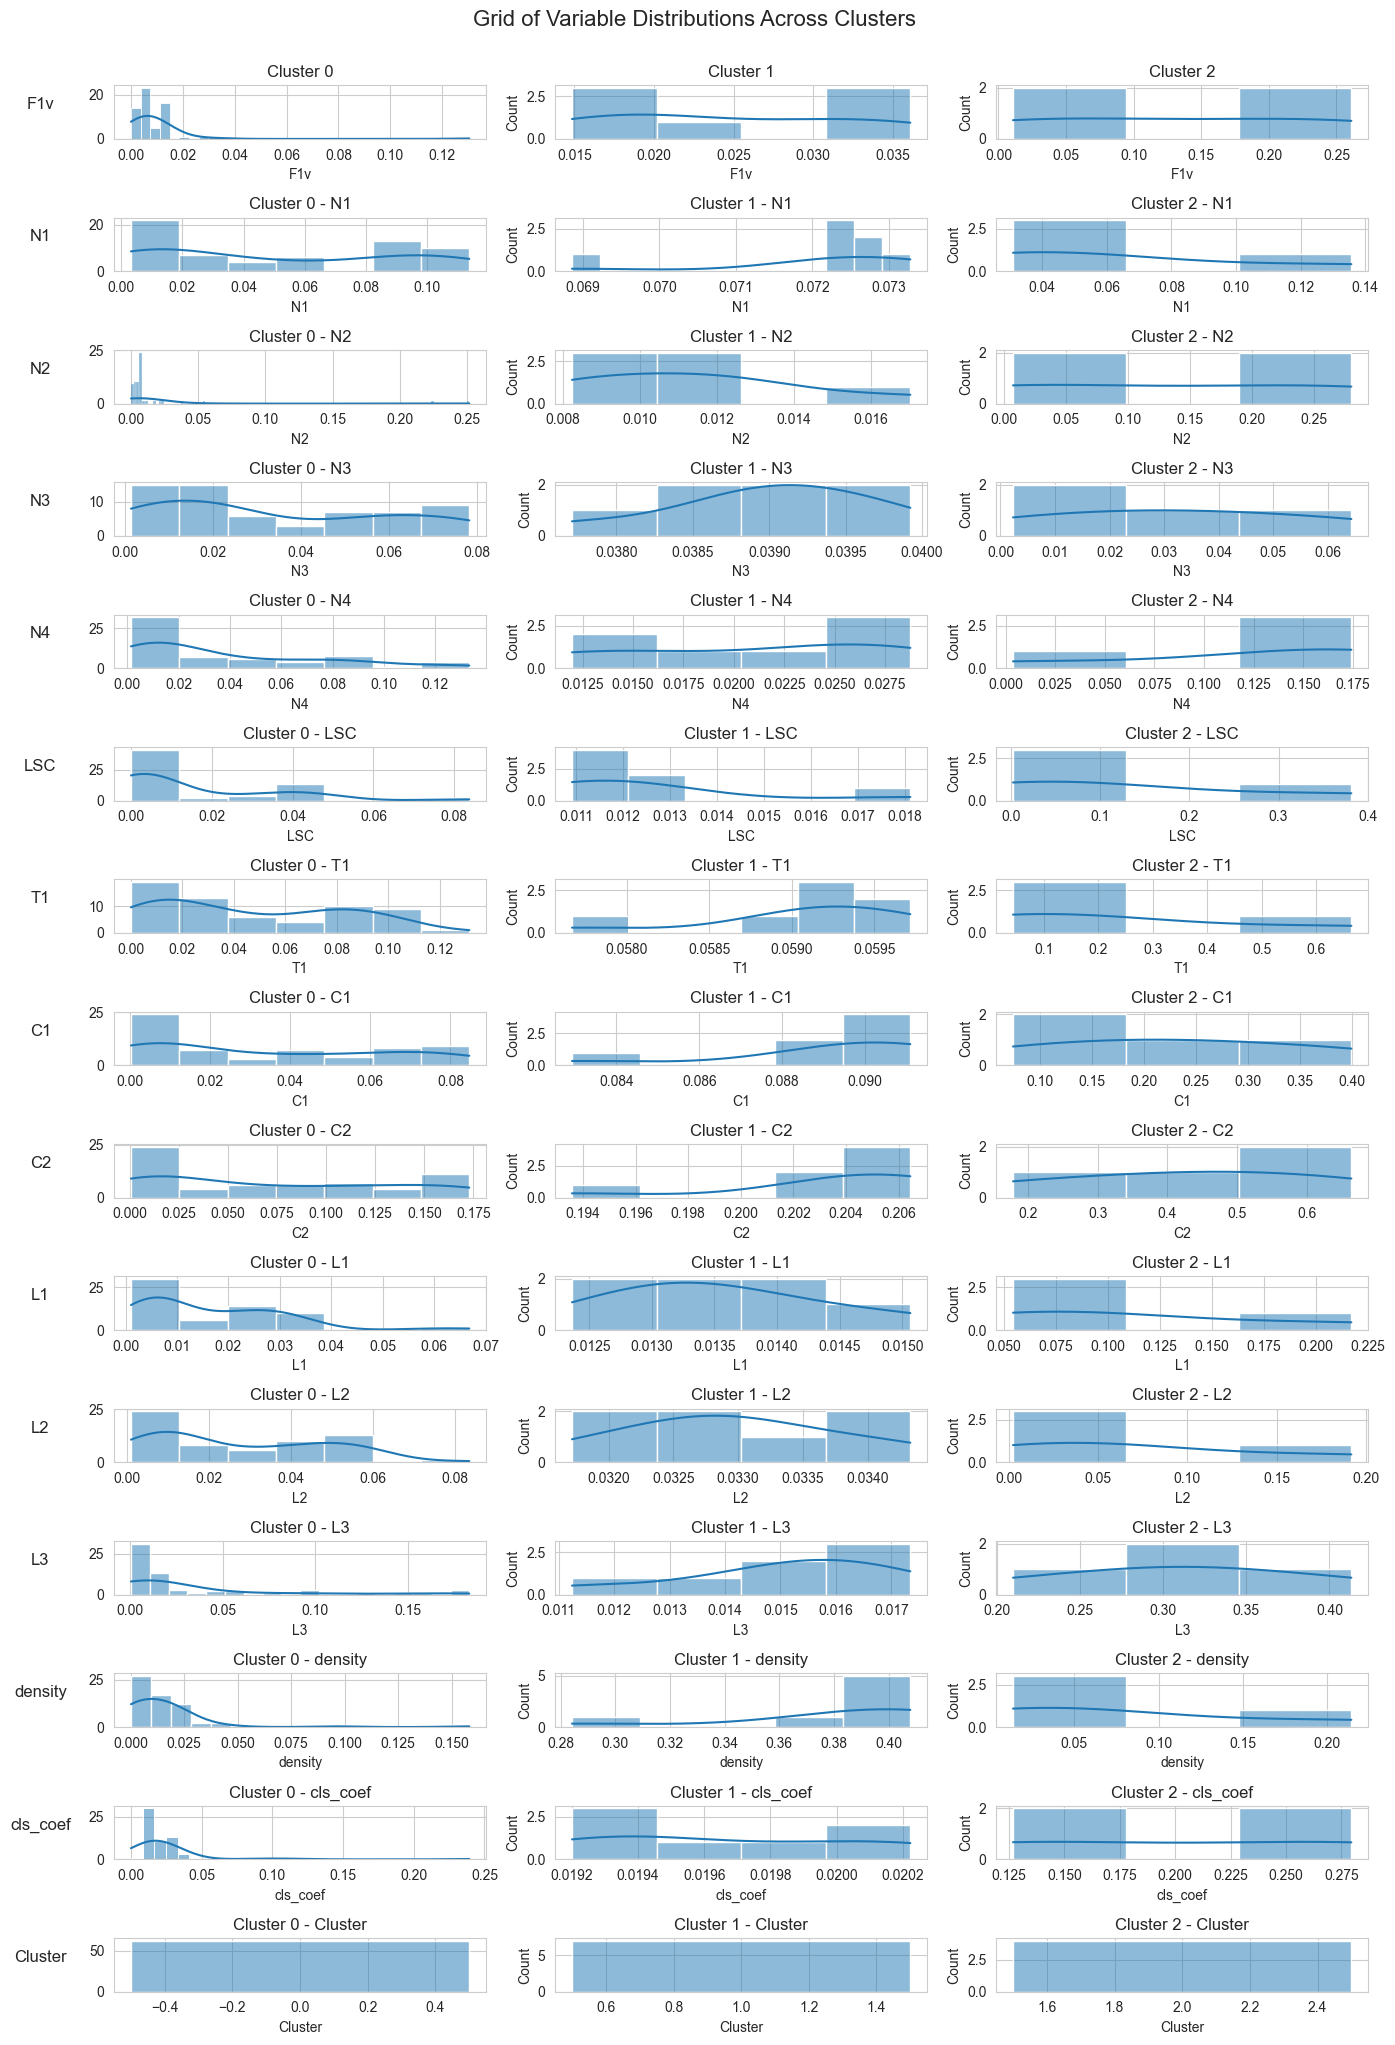

In [32]:
import seaborn as sns
best_n_clusters = n_clusters

# Initialize the grid of subplots
fig, axes = plt.subplots(nrows=len(result_df.columns), ncols=best_n_clusters, figsize=(14, 20))

# Iterate through each variable and cluster to plot the distribution
for i, variable in enumerate(result_df.columns):
    for j in range(best_n_clusters):
        sns.histplot(result_df[result_df['Cluster'] == j][variable], kde=True, ax=axes[i, j])
        axes[i, j].set_title(f"Cluster {j} - {variable}")

# Add labels and title
for ax, col in zip(axes[0], [f"Cluster {i}" for i in range(best_n_clusters)]):
    ax.set_title(col)

for ax, row in zip(axes[:,0], result_df.columns):
    ax.set_ylabel(row, rotation=0, size='large', labelpad=35)

plt.tight_layout()
plt.suptitle('Grid of Variable Distributions Across Clusters', y=1.02, fontsize=16)
plt.savefig("plots/cm_clustering_var_distribution.pdf", bbox_inches='tight')

plt.show()

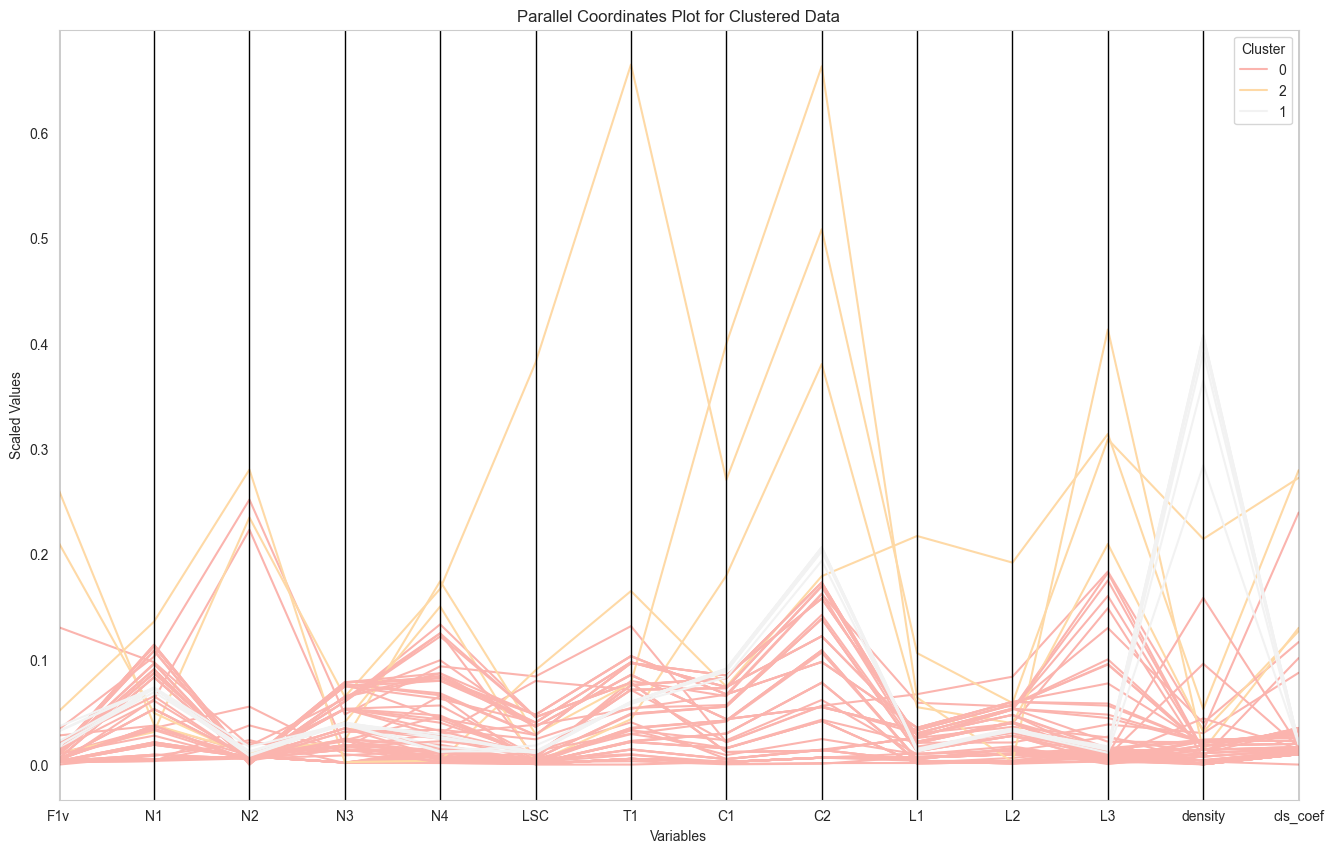

In [33]:
from pandas.plotting import parallel_coordinates

# Plot the parallel coordinates figure
plt.figure(figsize=(16, 10))
parallel_coordinates(result_df, 'Cluster', colormap='Pastel1')
plt.title('Parallel Coordinates Plot for Clustered Data')
plt.xlabel('Variables')
plt.ylabel('Scaled Values')
plt.legend(title='Cluster', loc='upper right')
plt.show()

In [33]:
result_df.to_csv('complexity_df_diff_syn.csv')
result_df

,F1v,N1,N2,N3,N4,LSC,T1,T2,T3,T4,C1,C2,L1,L2,L3,density,cls_coef,hubs,Cluster
complete_name,,,,,,,,,,,,,,,,,,,
S1A,0.002202,0.003554,0.005861,0.008721,0.014005,0.002380,0.009162,0.000008,0.000008,0.0,0.002438,0.006577,0.003614,0.001723,0.011423,0.000387,0.011439,0.000004,0
S1B0,0.004148,0.004926,0.007779,0.001939,0.001739,0.000536,0.005463,0.000008,0.000008,0.0,0.002438,0.006577,0.007084,0.010609,0.005717,0.000381,0.009832,0.000004,0
S1B1,0.004148,0.004926,0.007779,0.001939,0.008303,0.000536,0.005265,0.000008,0.000008,0.0,0.002438,0.006577,0.007086,0.010605,0.015871,0.000381,0.009832,0.000004,0
S1B10,0.004148,0.004926,0.007779,0.001939,0.012625,0.000537,0.005463,0.000008,0.000008,0.0,0.002438,0.006577,0.006568,0.010003,0.009497,0.000381,0.009832,0.000004,0
S1B11,0.004148,0.004926,0.007779,0.001939,0.001462,0.000537,0.005463,0.000008,0.000008,0.0,0.002438,0.006577,0.006568,0.010003,0.005751,0.000381,0.009832,0.000004,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S4A5,0.018540,0.068859,0.011882,0.037710,0.011974,0.018117,0.057669,0.000008,0.000008,0.0,0.082928,0.193588,0.014199,0.031718,0.011238,0.284140,0.019200,0.000004,0
S4A6,0.021993,0.072291,0.012449,0.039923,0.025887,0.012592,0.058915,0.000008,0.000206,0.5,0.088427,0.202603,0.015064,0.034328,0.014793,0.364441,0.019322,0.000004,1
S4A7,0.031822,0.073278,0.017027,0.038742,0.012630,0.012463,0.059718,0.000008,0.000206,0.5,0.089384,0.203706,0.012363,0.032324,0.013862,0.391581,0.020223,0.000004,1


In [34]:
df = result_df.reset_index()
df

,complete_name,F1v,N1,N2,N3,N4,LSC,T1,C1,C2,L1,L2,L3,density,cls_coef,Cluster
0,S1A,0.002202,0.003554,0.005861,0.008721,0.014005,0.002380,0.009162,0.002438,0.006577,0.003614,0.001723,0.011423,0.000387,0.011439,0
1,S1B0,0.004148,0.004926,0.007779,0.001939,0.001739,0.000536,0.005463,0.002438,0.006577,0.007084,0.010609,0.005717,0.000381,0.009832,0
2,S1B1,0.004148,0.004926,0.007779,0.001939,0.008303,0.000536,0.005265,0.002438,0.006577,0.007086,0.010605,0.015871,0.000381,0.009832,0
3,S1B10,0.004148,0.004926,0.007779,0.001939,0.012625,0.000537,0.005463,0.002438,0.006577,0.006568,0.010003,0.009497,0.000381,0.009832,0
4,S1B11,0.004148,0.004926,0.007779,0.001939,0.001462,0.000537,0.005463,0.002438,0.006577,0.006568,0.010003,0.005751,0.000381,0.009832,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,S4A5,0.018540,0.068859,0.011882,0.037710,0.011974,0.018117,0.057669,0.082928,0.193588,0.014199,0.031718,0.011238,0.284140,0.019200,1
69,S4A6,0.021993,0.072291,0.012449,0.039923,0.025887,0.012592,0.058915,0.088427,0.202603,0.015064,0.034328,0.014793,0.364441,0.019322,1
70,S4A7,0.031822,0.073278,0.017027,0.038742,0.012630,0.012463,0.059718,0.089384,0.203706,0.012363,0.032324,0.013862,0.391581,0.020223,1
71,S4A8,0.031543,0.072444,0.008755,0.039497,0.026253,0.010907,0.059479,0.090321,0.205154,0.013782,0.033688,0.015780,0.401999,0.020164,1


In [35]:
clusters = df.groupby('Cluster')['complete_name'].agg(', '.join).reset_index()
clusters

,Cluster,complete_name
0,0,"S1A, S1B0, S1B1, S1B10, S1B11, S1B2, S1B3, S1B..."
1,1,"S4A10, S4A11, S4A5, S4A6, S4A7, S4A8, S4A9"
2,2,"S1D5, S1D6, S1F2, S1F3"
